# Create CSV File

In [3]:
# ANTS
# DSC: 0.3491227626800537
#  RDSC: 0.3835054039955139
#  HD95: 2.3548353667875346
#  TRE: 2.462481737136841
#  RTRE: 2.219017744064331
#  RTs: 1.1109514236450195
#  StDJD: nan
#  DSC: 0.8711435794830322
#  RDSC: 0.8782639503479004

# NOTHING
# DSC: 0.2855788767337799
#  RDSC: 0.3339221179485321
#  HD95: 8.769741433888248
#  TRE: 6.7462592124938965
#  RTRE: 6.358316898345947
#  RTs: 4.347846984863281
#  StDJD: nan
#  DSC: 0.4232326149940491
#  RDSC: 0.49403560161590576

import csv
import os

# Define the column headers
headers = ['Model', 'Trial', 'DSC', 'RDSC', 'HD95', 'TRE', 'RTRE', 'RTs', 'StDJD', 'DSC Gland', 'RDSC Gland', 'Final Score']

# Sample data rows
data_rows = [
    ['Nothing', 'nan', 0.29, 0.33, 8.77, 6.75, 6.6, 4.35, 'nan', 0.42, 0.49, 0.09],
    ['ANTS', 'nan', 0.35, 0.38, 2.35, 2.46, 2.22, 1.11, 'nan', 0.87, 0.88, 0.58]
]

# Write to CSV file
os.makedirs('H2_Experiments', exist_ok=True)
csv_path = 'H2_Experiments/model_results_H2.csv'
with open('H2_Experiments/model_results_H2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header row
    writer.writerow(headers)
    
    # Write data rows
    writer.writerows(data_rows)

print("CSV file created successfully!")

CSV file created successfully!


# Cache Data
## set the data source here

In [1]:
# imports
import os, sys

# third party imports
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2.'), 'This tutorial assumes Tensorflow 2.0+'
from tensorflow.keras import layers
from tensorflow import keras

# local imports
import voxelmorph as vxm
import neurite as ne


from skimage.transform import resize
import nibabel as nib

import matplotlib.pyplot as plt

import os, re
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import SimpleITK as sitk
import csv

import os
#os.environ["CUDA_VISIBLE_DEVICES"]=""

import tensorflow as tf
import numpy as np
from scipy.ndimage import _ni_support
from scipy.ndimage import generate_binary_structure, distance_transform_edt, binary_erosion

#from data_generator import resize_3d_image
from tqdm import tqdm

def resize_3d_image(image, shape):
    resized_image = resize(image, output_shape=shape)
    if np.amax(resized_image) == np.amin(resized_image):
        normalised_image = resized_image
    else:
        normalised_image = (resized_image-np.amin(resized_image))/(np.amax(resized_image)-np.amin(resized_image))
    return normalised_image

def load_dataset_into_cache(f_path, moving_image_shape, fixed_image_shape, with_label_inputs=True):
    moving_images_path = os.path.join(f_path, 'us_images')
    fixed_images_path = os.path.join(f_path, 'mr_images')

    all_names = np.array(os.listdir(fixed_images_path))

    cache = {}

    for f_name in all_names:
        moving_image = nib.load(os.path.join(moving_images_path, f_name)).get_fdata()
        fixed_image = nib.load(os.path.join(fixed_images_path, f_name)).get_fdata()

        moving_image_resized = resize_3d_image(moving_image, moving_image_shape)
        fixed_image_resized = resize_3d_image(fixed_image, fixed_image_shape)

        entry = {
            "moving": moving_image_resized,
            "fixed": fixed_image_resized,
        }

        if with_label_inputs:
            moving_labels_path = os.path.join(f_path, 'us_labels')
            fixed_labels_path = os.path.join(f_path, 'mr_labels')

            moving_label = nib.load(os.path.join(moving_labels_path, f_name)).get_fdata()
            fixed_label = nib.load(os.path.join(fixed_labels_path, f_name)).get_fdata()

            entry["moving_label"] = moving_label
            entry["fixed_label"] = fixed_label

        cache[f_name] = entry

    return cache

# =========================================
# DEFINING THE SHAPES WE ARE WORKING WITH
# =========================================

moving_image_shape = (64, 64, 64, 1)
fixed_image_shape = (64, 64, 64, 1)

# train_cache = load_dataset_into_cache("pp_data/train", moving_image_shape, moving_image_shape, with_label_inputs=True)
# test_cache = load_dataset_into_cache("pp_data/val", moving_image_shape, moving_image_shape, with_label_inputs=True)
train_cache = load_dataset_into_cache("nifti_data_preprocessed/train", moving_image_shape, moving_image_shape, with_label_inputs=True)
test_cache = load_dataset_into_cache("nifti_data_preprocessed/val", moving_image_shape, moving_image_shape, with_label_inputs=True)

2025-10-20 15:44:19.213903: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-20 15:44:19.214162: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-20 15:44:19.251298: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-20 15:44:20.800815: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-poin

In [2]:
import scipy.ndimage as nd



In [3]:
import numpy as np
import scipy.ndimage as nd



# Experiments D

In [10]:
import os
import glob

csv_path = 'H2_Experiments/model_results_H2.csv'

def run_experiments_H2( name,
                        p_affine=0.7,
                        p_elastic=0.7,
                        alpha=2,
                        sigma=20,
                        degree_range=[-5,5],
                        model_save_path = "H2_Experiments/",
                        lr=0.001,
                        lambda_param=0.05,
                        Verbose=False,
                        wait=5,
                        write = False,
                        attempts=2
                        ):
    
    model_save_path = model_save_path + name + '_Checkpoints'

    best_trials = np.zeros(attempts).tolist()

    # ===================================
    # AUGMENTATION TRANSFORMS
    # ===================================

    # ------ AFFINE TRANSFORM ----------
    
    def augment_pair_3d_affine(moving, fixed, moving_label, fixed_label, with_label_inputs=True):
        # random small rotation
        # angle = np.random.uniform(-5, 5)  # degrees
        angle = np.random.uniform(degree_range[0], degree_range[1])  # degrees
        axes = (0,1)  # rotate in xy-plane, can randomize
        moving = nd.rotate(moving, angle, axes=axes, reshape=False, order=1, mode='nearest')
        fixed  = nd.rotate(fixed,  angle, axes=axes, reshape=False, order=1, mode='nearest')
        if with_label_inputs:
            moving_label = nd.rotate(moving_label, angle, axes=axes, reshape=False, order=0, mode='nearest')
            fixed_label  = nd.rotate(fixed_label,  angle, axes=axes, reshape=False, order=0, mode='nearest')
    
        # intensity jitter (only for images, not labels)
        # moving = moving + np.random.normal(0, 0.005, moving.shape)
        # fixed  = fixed  + np.random.normal(0, 0.005, fixed.shape)
    
        return moving, fixed, moving_label, fixed_label

    # ------ ELASTIC TRANSFORM -----------

    def elastic_deform_3d(image, alpha=2, sigma=20, order=1):
        """
        Apply elastic deformation to a 3D volume. 
        alpha: scaling of deformation
        sigma: Gaussian smoothing of random displacement
        order: 1=linear (images), 0=nearest (labels)
        """
        shape = image.shape
        assert len(shape) == 3, f"Expected 3D array, got shape {shape}"
    
        # random displacement fields
        dx = nd.gaussian_filter((np.random.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
        dy = nd.gaussian_filter((np.random.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
        dz = nd.gaussian_filter((np.random.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    
        # meshgrid of base coordinates
        x, y, z = np.meshgrid(
            np.arange(shape[0]), np.arange(shape[1]), np.arange(shape[2]),
            indexing="ij"
        )
    
        # add displacements
        indices = np.array([
            (x + dx).flatten(),
            (y + dy).flatten(),
            (z + dz).flatten()
        ])
    
        # deform
        distorted = nd.map_coordinates(image, indices, order=order, mode='reflect').reshape(shape)
        return distorted



    def augment_pair_3d(moving, fixed, moving_label, fixed_label, with_label_inputs=True):
        # remove channel dim for processing
        moving = np.squeeze(moving)
        fixed  = np.squeeze(fixed)
        if with_label_inputs:
            moving_label = np.squeeze(moving_label)
            fixed_label  = np.squeeze(fixed_label)
    
        # --- elastic deformation ---
        # moving = elastic_deform_3d(moving, alpha=2, sigma=20, order=1)
        # fixed  = elastic_deform_3d(fixed,  alpha=2, sigma=20, order=1)
        moving = elastic_deform_3d(moving, alpha=alpha, sigma=sigma, order=1)
        fixed  = elastic_deform_3d(fixed,  alpha=alpha, sigma=sigma, order=1)
        if with_label_inputs:
            moving_label = elastic_deform_3d(moving_label, alpha=2, sigma=20, order=0)
            fixed_label  = elastic_deform_3d(fixed_label,  alpha=2, sigma=20, order=0)
        
    
        # restore channel dim
        moving = moving[..., None]
        fixed  = fixed[..., None]
        if with_label_inputs:
            moving_label = moving_label[..., None]
            fixed_label  = fixed_label[..., None]
    
        return moving, fixed, moving_label, fixed_label

    #===========================
    # MODEL BACKBONE DEFINITION
    #===========================

    def get_model(moving_image_shape, fixed_image_shape, with_label_inputs=True, up_filters=[64, 128, 256], down_filters=[256, 128, 64, 32]):
    
        input_moving_image = keras.Input(moving_image_shape)
        input_fixed_image = keras.Input(fixed_image_shape)
    
        if with_label_inputs:
            input_moving_label = keras.Input(moving_image_shape)
            input_fixed_label = keras.Input(fixed_image_shape)
    
        concatenate_layer = layers.Concatenate(axis=-1)([input_moving_image, input_fixed_image])
    
        ### [First half of the network: downsampling inputs] ###
    
        # Entry block
        x = layers.Conv3D(32, 3, strides=2, padding="same")(concatenate_layer)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
    
        previous_block_activation = x  # Set aside residual
    
        # Blocks 1, 2, 3 are identical apart from the feature depth.
        for filters in up_filters:
            x = layers.Activation("relu")(x)
            x = layers.Conv3D(filters, 3, padding="same")(x)
            x = layers.BatchNormalization()(x)
    
            x = layers.Activation("relu")(x)
            x = layers.Conv3D(filters, 3, padding="same")(x)
            x = layers.BatchNormalization()(x)
    
            x = layers.MaxPooling3D(3, strides=2, padding="same")(x)
    
            # Project residual
            residual = layers.Conv3D(filters, 1, strides=2, padding="same")(
                previous_block_activation
            )
            x = layers.add([x, residual])  # Add back residual
            previous_block_activation = x  # Set aside next residual
    
        ### [Second half of the network: upsampling inputs] ###
    
        for filters in down_filters:
            x = layers.Activation("relu")(x)
            x = layers.Conv3DTranspose(filters, 3, padding="same")(x)
            x = layers.BatchNormalization()(x)
    
            x = layers.Activation("relu")(x)
            x = layers.Conv3DTranspose(filters, 3, padding="same")(x)
            x = layers.BatchNormalization()(x)
    
            x = layers.UpSampling3D(2)(x)
    
            # Project residual
            residual = layers.UpSampling3D(2)(previous_block_activation)
            residual = layers.Conv3D(filters, 1, padding="same")(residual)
            x = layers.add([x, residual])  # Add back residual
            previous_block_activation = x  # Set aside next residual
    
        # Add a per-pixel classification layer
        out_ddf = layers.Conv3D(3, 3, activation="linear", padding="same")(x)
    
        # Define the model
        if with_label_inputs:
            model = keras.Model(inputs=[input_moving_image, input_fixed_image, input_moving_label, input_fixed_label], outputs=[out_ddf])
        else:
            model = keras.Model(inputs=[input_moving_image, input_fixed_image], outputs=[out_ddf])
        return model

    def train_generator_(cache, batch_size, moving_image_shape, fixed_image_shape, with_label_inputs=True):
        
        all_names = list(cache.keys())
    
        while True:
            batch_names = np.random.permutation(all_names)[:batch_size]
    
            moving_images_batch = np.zeros((batch_size, *moving_image_shape))
            fixed_images_batch = np.zeros((batch_size, *fixed_image_shape))
    
            if with_label_inputs:
                moving_labels_batch = np.zeros((batch_size, *moving_image_shape))
                fixed_labels_batch = np.zeros((batch_size, *fixed_image_shape))
    
            for i, f_name in enumerate(batch_names):
                entry = cache[f_name]
                moving = entry["moving"]
                fixed  = entry["fixed"]
    
                if with_label_inputs:
                    label_to_select = np.random.randint(6)
                    moving_label = resize_3d_image(entry["moving_label"][:, :, :, label_to_select], moving_image_shape)
                    fixed_label  = resize_3d_image(entry["fixed_label"][:, :, :, label_to_select], fixed_image_shape)
                else:
                    moving_label, fixed_label = None, None

                
                if np.random.rand() < p_affine:
                    # Apply augmentation here
                    moving, fixed, moving_label, fixed_label = augment_pair_3d_affine(
                        moving, fixed, moving_label, fixed_label, with_label_inputs
                    )

                if np.random.rand() < p_elastic:
                    # Apply augmentation here
                    moving, fixed, moving_label, fixed_label = augment_pair_3d(
                        moving, fixed, moving_label, fixed_label, with_label_inputs
                    )
    
                # assign into batch
                moving_images_batch[i] = moving
                fixed_images_batch[i]  = fixed
                if with_label_inputs:
                    moving_labels_batch[i] = moving_label
                    fixed_labels_batch[i]  = fixed_label
    
            zero_phis = np.zeros([batch_size, *moving_image_shape[:-1], 3])
    
            if with_label_inputs:
                inputs = (moving_images_batch, fixed_images_batch, moving_labels_batch, fixed_labels_batch)
                outputs = (fixed_images_batch, zero_phis, fixed_labels_batch)
            else:
                inputs = (moving_images_batch, fixed_images_batch)
                outputs = (fixed_images_batch, zero_phis)
    
            yield inputs, outputs



    def test_generator(cache, batch_size, moving_image_shape, fixed_image_shape, start_index, end_index, label_num, with_label_inputs=True):
        all_names = list(cache.keys())[start_index:end_index]
        n_steps = int(np.floor(len(all_names) / batch_size))
    
        for step in range(n_steps):
            batch_names = all_names[step*batch_size:(step+1)*batch_size]
    
            moving_images_batch = np.zeros((batch_size, *moving_image_shape))
            fixed_images_batch = np.zeros((batch_size, *fixed_image_shape))
    
            if with_label_inputs:
                moving_labels_batch = np.zeros((batch_size, *moving_image_shape))
                fixed_labels_batch = np.zeros((batch_size, *fixed_image_shape))
    
            for i, f_name in enumerate(batch_names):
                entry = cache[f_name]
                moving_images_batch[i] = entry["moving"]
                fixed_images_batch[i] = entry["fixed"]
    
                if with_label_inputs:
                    moving_labels_batch[i] = resize_3d_image(entry["moving_label"][:, :, :, label_num], moving_image_shape)
                    fixed_labels_batch[i] = resize_3d_image(entry["fixed_label"][:, :, :, label_num], fixed_image_shape)
    
            zero_phis = np.zeros([batch_size, *moving_image_shape[:-1], 3])
    
            if with_label_inputs:
                inputs = [moving_images_batch, fixed_images_batch, moving_labels_batch, fixed_labels_batch]
                outputs = [fixed_images_batch, zero_phis, fixed_labels_batch]
            else:
                inputs = [moving_images_batch, fixed_images_batch]
                outputs = [fixed_images_batch, zero_phis]
    
            yield inputs, outputs

    # =========================================
    # Train Model
    # =========================================
    spatial_transformer = vxm.layers.SpatialTransformer(name='transformer')
    def get_compiled_model():
        model = get_model(moving_image_shape, fixed_image_shape, with_label_inputs=False)

        if Verbose:
            print('\nBackbone model inputs and outputs:')
            print('    input shape: ', ', '.join([str(t.shape) for t in model.inputs]))
            print('    output shape:', ', '.join([str(t.shape) for t in model.outputs]))

        # =============================================================================
        # Build the registration network
        # =============================================================================

        # build transformer layer
        spatial_transformer = vxm.layers.SpatialTransformer(name='transformer')
        
        # extract the moving image
        moving_image = model.input[0]
        fixed_image = model.inputs[1]
        input_moving_label = keras.Input(moving_image_shape, name="moving_label")
        input_fixed_label  = keras.Input(fixed_image_shape,  name="fixed_label")
        inputs=[moving_image, fixed_image, input_moving_label, input_fixed_label]
        
        # extract ddf
        ddf = model.outputs[0]
        
        # warp the moving image with the transformer using network-predicted ddf
        moved_image = spatial_transformer([moving_image, ddf])
        moved_label = spatial_transformer([input_moving_label, ddf])
        fixed_label = spatial_transformer([input_moving_label, ddf])*0 + input_fixed_label # This is a hacky way of making keras stop complaining about inputs not connected to outputs
        
        outputs = [moved_image, ddf, moved_label]
        
        registration_model = keras.Model(inputs=inputs, outputs=outputs)
        
        print('\nRegistration network inputs and outputs:')
        
        print('    input shape: ', ', '.join([str(t.shape) for t in registration_model.inputs]))
        print('    output shape:', ', '.join([str(t.shape) for t in registration_model.outputs]))
        
        losses = [vxm.losses.NCC().loss, vxm.losses.Grad('l2').loss, vxm.losses.Dice().loss]
    
        loss_weights = [0, lambda_param, 1]

        from tensorflow.keras.optimizers import Adam

        # Create Adam optimizer with custom learning rate
        custom_optimizer = Adam(learning_rate=lr)  # or any value you want
        
        registration_model.compile(optimizer=custom_optimizer, loss=losses, loss_weights=loss_weights)
        
        return registration_model

    def should_stop(val_dice, patience=5, min_delta=1e-4):
        """
        Decide if training should stop based on validation Dice history.
    
        Args:
            val_dice (list or array): validation Dice values after each epoch.
            patience (int): how many epochs to wait for improvement.
            min_delta (float): minimum relative improvement to count as progress.
    
        Returns:
            bool: True if stopping is suggested, False otherwise.
        """
        if len(val_dice) < patience + 1:
            return False  # not enough history yet
    
        best_so_far = max(val_dice[:-patience])  # best before last 'patience' epochs
        recent_best = max(val_dice[-patience:])  # best within last 'patience' epochs
    
        # if recent improvements aren't better than old best + delta → stop
        if recent_best < best_so_far + min_delta:
            return True

        return False


    def train_model(attempt):

        registration_model = get_compiled_model()

        val_dice = []
        losses = []
        transformer_losses = []
        conv3d_losses = []

        # =============================================================================
        # Training loop
        # =============================================================================

        batch_size = 8 # Decrease this if you are running out of RAM - set to 4, 8, 16 ect.

        train_gen = train_generator_(train_cache, batch_size, moving_image_shape, fixed_image_shape, with_label_inputs=True)
        
        num_trials = 1024 # This may be way above what we require

        best_dice = max(val_dice) if val_dice else -1.0

        for trial in range(num_trials):
            
            print(f'\nTrial {trial} / {num_trials-1} of Experiment :' + name)

            hist = registration_model.fit(train_gen, epochs=1, steps_per_epoch=32, verbose=1);

            dice_scores = []

            for label_num in range(6):
                
                val_gen = test_generator(test_cache, 1, moving_image_shape, fixed_image_shape, start_index=None, end_index=None, label_num=label_num, with_label_inputs=True)
                val_count = 0
                while True:
                    try:
                        (val_inputs, val_outputs) = next(val_gen)
                        moving_images_val, fixed_images_val, moving_labels_val, fixed_labels_val = val_inputs
                        fixed_images_val, zero_phis_val, fixed_labels_val = val_outputs
                        _, ddf_val, _ = registration_model.predict((moving_images_val, fixed_images_val, moving_labels_val, fixed_labels_val), verbose=0)
        
                        moved_labels_val = spatial_transformer([moving_labels_val, ddf_val])
                        moved_images_val = spatial_transformer([moving_images_val, ddf_val])

                        if label_num == 0 and Verbose and val_count == 0:
                            ddf = ddf_val[0].squeeze()  # Remove batch/channel dims -> (64, 64, 64, 3) # WAS 1
                            mid_z = ddf.shape[0] // 2
                            mid_plane = ddf[mid_z, :, :, :]  # Take middle z-slice -> (64, 64, 3)
                            
                            # Downsample for cleaner visualization
                            flow = mid_plane[::1, ::1]  # Downsample to (21, 21, 3)
                            
                            # Visualize (showing x,y components only - drop z-component for 2D plot)
                            #flow = np.stack([-flow[0][..., 1], -flow[0][..., 0]], axis=-1)
                            ne.plot.flow([flow[..., :2]], width=5);  # Only show x,y vectors
                            val_count += 1

                        dice_score = np.array(-1.0 * vxm.losses.Dice().loss(tf.convert_to_tensor(moved_labels_val, dtype='float32'), tf.convert_to_tensor(fixed_labels_val, dtype='float32')))
                        dice_scores.append(dice_score)

                        print('.', end='')
                        
                    except (IndexError, StopIteration) as e:
                        
                        break

            if Verbose:
                values = [arr.item() for arr in dice_scores]
                print(values)
                    
            losses.append(hist.history["loss"][0])
            transformer_losses.append(hist.history["transformer_loss"][0])
            conv_loss_key = next(
                (key for key in hist.history.keys() 
                 if key.startswith('conv3d_') and key.endswith('_loss')),
                None
            )                
            conv3d_losses.append(hist.history[conv_loss_key][0]) 
            val_dice.append(np.mean(dice_scores))
    
            if Verbose:
                plt.figure(figsize=(12, 4))
                plt.subplot(1, 3, 1)
                plt.subplots_adjust(wspace=0.5) 
                
                plt.plot(losses, label="Loss")
                plt.plot(transformer_losses, label="Transformer Loss")
                plt.xlabel('Trials')
                plt.ylabel('Losses')
                plt.legend()  
        
                plt.subplot(1, 3, 2)
                plt.plot(conv3d_losses, label="Conv3D Loss")
                plt.xlabel('Trials')
                plt.ylabel('Losses')
                plt.legend()  
                                     
                plt.subplot(1, 3, 3)
                plt.plot(val_dice, 'r')
                plt.xlabel('Trials')
                plt.ylabel('Dice')
                plt.savefig(r'voxelmorph_val_dice_1.png')
                plt.show()
            
            print('    Validation Dice: ', np.mean(dice_scores))

            np.save(os.path.join(model_save_path, "losses"+str(attempt)+".npy"), np.array(losses))
            np.save(os.path.join(model_save_path, "transformer_losses"+str(attempt)+".npy"), np.array(transformer_losses))
            np.save(os.path.join(model_save_path, "conv3d_losses"+str(attempt)+".npy"), np.array(conv3d_losses))
            np.save(os.path.join(model_save_path, "val_dice"+str(attempt)+".npy"), np.array(val_dice))
            print("Training history saved.")

            if np.mean(dice_scores) >= best_dice:
                save_path = os.path.join(model_save_path, f"BEST_DICE{attempt}.weights.h5")
                registration_model.save_weights(save_path)
                print("Weights for trail"+ str(trial) +f" saved to {save_path}")
                best_dice = max(val_dice) 

                best_trials[attempt] = trial

            if should_stop(val_dice):
                print("Ending Experiment")
                return
                    
    os.makedirs(model_save_path, exist_ok=True)
    
    for attempt in range(attempts): # TWO ATTEMPTS
        train_model(attempt) 

    # =====================================
    # EVALUATION HELPER METHODS
    # =====================================

    def resize_3d_image_(image, shape):
        # Convert TensorFlow tensor to NumPy array if needed
        if hasattr(image, 'numpy'):
            image = image.numpy()
        elif isinstance(image, tf.Tensor):
            image = image.numpy()
    
        if hasattr(shape, 'numpy'):
            shape = shape.numpy()
        elif isinstance(shape, tf.Tensor):
            shape = shape.numpy()
        
        resized_image = resize(image, output_shape=shape)
        if np.amax(resized_image) == np.amin(resized_image):
            normalised_image = resized_image
        else:
            normalised_image = (resized_image - np.amin(resized_image)) / (np.amax(resized_image) - np.amin(resized_image))
        return normalised_image

    def DSC(y_true, y_pred):
            
        dice = np.array(-1.0 * vxm.losses.Dice().loss(y_pred, y_true))
        return dice
    
    def RDSC(y_true, y_pred):
            
        ndims = len(y_pred.get_shape().as_list()) - 2
        vol_axes = list(range(1, ndims + 1))
    
        top = 2 * tf.reduce_sum(y_true * y_pred, vol_axes)
        bottom = tf.reduce_sum(y_true + y_pred, vol_axes)
    
        div_no_nan = tf.math.divide_no_nan if hasattr(
            tf.math, 'divide_no_nan') else tf.div_no_nan  
        dice_scores_all = div_no_nan(top, bottom)
        sorted_indices = tf.argsort(dice_scores_all, axis=0, direction='DESCENDING')
        num_samples_dsc = tf.convert_to_tensor(tf.math.round(len(sorted_indices) * 0.68))
        dsc_scores_for_robustness = tf.gather(dice_scores_all, sorted_indices[:tf.cast(num_samples_dsc, dtype=tf.int32)])
        rdsc = tf.reduce_mean(tf.squeeze(dsc_scores_for_robustness))
        return rdsc
    
    def compute_centroids(y_true, y_pred):    
        # find centroid locations in y_true
        y_true_centroids = []
        for i in range(len(y_true)):
            y_true_ones_indices = tf.where(y_true[i] > 0.5)
            image_centroid = tf.math.reduce_mean(y_true_ones_indices[:, :-1], axis=0)
            y_true_centroids.append(image_centroid)
        y_true_centroids = tf.stack(y_true_centroids)
        
        #find centroid locations in y_pred
        y_pred_centroids = []
        for i in range(len(y_pred)):
            y_pred_ones_indices = tf.where(y_pred[i] > 0.5)
            image_centroid = tf.math.reduce_mean(y_pred_ones_indices[:, :-1], axis=0)
            y_pred_centroids.append(image_centroid)
        y_pred_centroids = tf.stack(y_pred_centroids)
        return y_true_centroids, y_pred_centroids
    
    def centroid_maes(y_true, y_pred):    
        y_true_centroids, y_pred_centroids = compute_centroids(y_true, y_pred)
        maes = tf.keras.losses.MAE(y_true_centroids, y_pred_centroids)
        return maes
    
    def RMS(tensor):
        return tf.math.sqrt(tf.cast(tf.math.reduce_mean(tf.math.square(tensor)), dtype=tf.float32))
    
    def TRE(all_label_maes):
        TREs = []
        for i in range(len(all_label_maes)):
            case = all_label_maes[i]
            case_rms = RMS(case)
            TREs.append(case_rms)
        mTRE = tf.math.reduce_mean(tf.stack(TREs))
        return mTRE
    
    def RTRE(all_label_maes):
        TREs = []
        for i in range(len(all_label_maes)):
            case = all_label_maes[i]
            case_rms = RMS(case)
            TREs.append(case_rms)
        TREs =tf.stack(TREs)
        
        sorted_indices = tf.argsort(TREs, axis=0, direction='ASCENDING')
        num_samples_tre = tf.convert_to_tensor(tf.math.round(len(sorted_indices) * 0.68))
        # tres_for_robustness = TREs[0:tf.cast(num_samples_tre, dtype=tf.int32)]
        tres_for_robustness = tf.gather(TREs, sorted_indices[:tf.cast(num_samples_tre, dtype=tf.int32)])
        rtre = tf.reduce_mean(tf.squeeze(tres_for_robustness))
        return rtre
    
    def RTs(all_label_maes):
        TREs = []
        for i in range(len(all_label_maes)):
            case = all_label_maes[i]
            
            sorted_indices = tf.argsort(case, axis=0, direction='ASCENDING')
            num_samples_case_rts = tf.convert_to_tensor(tf.math.round(len(sorted_indices) * 0.68))
            # case_for_rts = case[0:tf.cast(num_samples_case_rts, dtype=tf.int32)]
            case_for_rts = tf.gather(case, sorted_indices[:tf.cast(num_samples_case_rts, dtype=tf.int32)])
            
            case_rms = RMS(case_for_rts)
            TREs.append(case_rms)
        mTRE = tf.math.reduce_mean(tf.stack(TREs))
        return mTRE
    
    # adapted from loli/medpy
    def surface_distances(result, reference, voxelspacing=None, connectivity=1):
        
        result = resize_3d_image_(result, np.shape(reference))
        
        result = np.atleast_1d(np.array(result).astype(bool))
        reference = np.atleast_1d(np.array(reference).astype(bool))
        
        if voxelspacing is not None:
            voxelspacing = _ni_support._normalize_sequence(voxelspacing, result.ndim)
            voxelspacing = np.asarray(voxelspacing, dtype=np.float64)
            if not voxelspacing.flags.contiguous:
                voxelspacing = voxelspacing.copy()
                
        footprint = generate_binary_structure(result.ndim, connectivity)
        
        result_border = result ^ binary_erosion(result, structure=footprint, iterations=1)
        reference_border = reference ^ binary_erosion(reference, structure=footprint, iterations=1)
        
        dt = distance_transform_edt(~reference_border, sampling=voxelspacing)
        sds = dt[result_border]
        
        return sds
    
    # adapted from loli/medpy
    
        
    def HD95(y_true, y_pred):
        
        all_hd95s = []

        #for i in tqdm(range(len(y_true))):
        for i in tqdm(range(len(y_true)), disable=True):
            
            if np.shape(y_true[i]) != np.shape(y_pred[i]):
                y_pred_to_use = resize_3d_image_(y_pred[i:i+1], np.shape(y_true[i:i+1]))
            else:
                y_pred_to_use = y_pred[i:i+1]
            
            voxelspacing = None
            connectivity = 1
            hd1 = surface_distances(y_pred_to_use, y_true[i:i+1], voxelspacing, connectivity)
            hd2 = surface_distances(y_true[i:i+1], y_pred_to_use, voxelspacing, connectivity)
            try:
                hd95 = np.percentile(np.hstack((hd1, hd2)), 95)
            except IndexError:
                hd95 = 0.0
            all_hd95s.append(hd95)
        return np.mean(all_hd95s)
    
    def StDJD(ddf):
        ddf_sitk = sitk.GetImageFromArray(ddf)
        ddf_sitk.SetOrigin((0, 0, 0))
        jacobian_determinant = sitk.DisplacementFieldJacobianDeterminant(ddf_sitk)
        std_jacobian_determinant = np.std(sitk.GetArrayFromImage(jacobian_determinant))
        return std_jacobian_determinant

    def evaluation_graphs(attempt):
        # Load arrays
        val_dice = np.load(os.path.join(model_save_path, "val_dice"+str(attempt)+".npy")).tolist()
        transformer_losses = np.load(os.path.join(model_save_path, "transformer_losses"+str(attempt)+".npy")).tolist()
        losses = np.load(os.path.join(model_save_path, "losses"+str(attempt)+".npy")).tolist()
        conv3d_losses = np.load(os.path.join(model_save_path, "conv3d_losses"+str(attempt)+".npy")).tolist()
    
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.subplots_adjust(wspace=0.5) 
        
        plt.plot(losses, label="Loss")
        plt.plot(transformer_losses, label="Transformer Loss")
        plt.xlabel('Trials')
        plt.ylabel('Losses')
        plt.legend()  
    
        plt.subplot(1, 3, 2)
        plt.plot(conv3d_losses, label="Conv3D Loss")
        plt.xlabel('Trials')
        plt.ylabel('Losses')
        plt.legend()  
                             
        plt.subplot(1, 3, 3)
        plt.plot(val_dice, 'r')
        plt.xlabel('Trials')
        plt.ylabel('Dice')
        plt.savefig(r'voxelmorph_val_dice_1.png')
        plt.show()

    def evaluate_model(attempt):
        
        evaluation_graphs(attempt)

        registration_model = get_compiled_model()

        registration_model.load_weights(model_save_path + "/BEST_DICE"+str(attempt)+".weights.h5")

        all_dscs = []
        all_rdscs = []

        all_dscs_gland = []
        all_rdscs_gland = []
        
        maes = []
        all_hd95s = []
        
        all_lim_hd95s = []
        all_lim_maes = []

        all_ddfs = []

        if Verbose:
            print("Evaluating for experiment "+name+", attempt "+str(attempt))
        
        for label_num in range(6):
            val_gen = test_generator(test_cache,
                                     4,
                                     moving_image_shape,
                                     fixed_image_shape,
                                     start_index=None,
                                     end_index=None,
                                     label_num=label_num,
                                     with_label_inputs=True)
            while True:
                try:
                    (val_inputs, val_outputs) = next(val_gen)
                    moving_images_val, fixed_images_val, moving_labels_val, fixed_labels_val = val_inputs
                    fixed_images_val, zero_phis_val, fixed_labels_val = val_outputs
                    _, ddf_val, _ = registration_model.predict((moving_images_val, fixed_images_val, moving_labels_val, fixed_labels_val), verbose=0)
    
                    all_ddfs.append(ddf_val)
                    
                    moved_labels_val = spatial_transformer([moving_labels_val, ddf_val])
                    moved_images_val = spatial_transformer([moving_images_val, ddf_val])

                    arg_moved = tf.convert_to_tensor(moved_labels_val, dtype='float32')
                    arg_fixed = tf.convert_to_tensor(fixed_labels_val, dtype='float32')

                    dice_score = np.array(-1.0 * vxm.losses.Dice().loss(arg_fixed, arg_moved))
                    if dice_score != 0:
                        all_dscs.append(dice_score)
                        rdsc = RDSC(arg_moved, arg_fixed)
                        all_rdscs.append(rdsc)
                        if label_num == 0:
                            all_dscs_gland.append(dice_score)
                            all_rdscs_gland.append(rdsc)
                    
                    mae = centroid_maes(arg_fixed, arg_moved)
                    hd95 = HD95(arg_fixed, arg_moved)
                    
                    lim_hd95 = HD95(arg_fixed, arg_moved)
                    lim_mae = centroid_maes(arg_fixed, arg_moved)
                                
                    maes.append(mae)
                    all_hd95s.append(hd95)
                    all_lim_hd95s.append(lim_hd95)
                    all_lim_maes.append(lim_mae)
                    
                except (IndexError, StopIteration) as e:
                    break
                    
        fin_DSC = np.mean(all_dscs)
        fin_DSC_G = np.mean(all_dscs_gland)
        fin_RDSC_G = np.mean(all_rdscs_gland)
        values = [arr.item() for arr in all_dscs]
        
        if Verbose:
            print(values)
            
        fin_RDSC = np.mean(all_rdscs)
        fin_HD95 = np.mean(all_hd95s)
        fin_lim_HD95 = np.mean(all_lim_hd95s)
    
        maes = [np.expand_dims(elem, -1) for elem in maes]
        all_maes_array = np.concatenate(maes, axis=-1)
        idx = np.argwhere(np.all(all_maes_array[..., :] == 0, axis=0))
        all_maes_array = np.delete(all_maes_array, idx, axis=1)
        
        lim_maes = [np.expand_dims(elem, -1) for elem in all_lim_maes]
        all_lim_maes_array = np.concatenate(lim_maes, axis=-1)
        idx = np.argwhere(np.all(all_lim_maes_array[..., :] == 0, axis=0))
        all_lim_maes_array = np.delete(all_lim_maes_array, idx, axis=1)
        
        fin_TRE = TRE(all_maes_array)
        fin_RTRE = RTRE(all_maes_array)
        fin_RTs = RTs(all_maes_array)
        
        fin_lim_TRE = TRE(all_lim_maes_array)
        fin_lim_RTRE = RTRE(all_lim_maes_array)
        fin_lim_RTs = RTs(all_lim_maes_array)
    
        stdjds = []
        for ddf in all_ddfs:
            stdjd = StDJD(ddf[0])
            stdjds.append(stdjd)
        
        fin_StDJD = np.mean(stdjds)
          
        max_HD95 = 8.77
        max_TRE = 6.75
        max_RTRE = 6.36
        max_RTs = 4.35

        final_score =(0.2*round(fin_DSC, 2) +
             0.1*round(fin_RDSC, 2) +
             0.2*np.clip((1-round(fin_HD95, 2)/max_HD95), 0, 1) +
             0.3*np.clip((1-round(fin_TRE.numpy(), 2)/max_TRE), 0, 1) +
             0.1*np.clip((1-round(fin_RTRE.numpy(), 2)/max_RTRE), 0, 1) +
             0.1*np.clip((1-round(fin_RTs.numpy(), 2)/max_RTs), 0, 1))
        
        print(final_score)
        
        if Verbose:
            print(f'\nALL METRICS:\n\n'
                f'DSC: {fin_DSC}\n',
                f'RDSC: {fin_RDSC}\n',
                f'HD95: {fin_HD95}\n',
                f'TRE: {fin_TRE}\n',
                f'RTRE: {fin_RTRE}\n',
                f'RTs: {fin_RTs}\n',
                f'StDJD: {fin_StDJD}\n',
                f'DSC: {fin_DSC_G}\n',
                f'RDSC: {fin_RDSC_G}\n',
                f'Final Score: {final_score}\n',
                )
            
        new_rows = [[
                    name, best_trials[attempt],
                     round(fin_DSC, 2),
                     round(fin_RDSC, 2),
                     round(fin_HD95, 2),
                     round(fin_TRE.numpy(), 2),
                     round(fin_RTRE.numpy(), 2),
                     round(fin_RTs.numpy(), 2),
                     round(fin_StDJD, 2),
                     round(fin_DSC_G, 2),
                     round(fin_RDSC_G, 2),
                     round(final_score, 2)
                ]]
        
        if final_score > best_attempt[1]:
            best_attempt[0] = attempt
            best_attempt[1] = final_score
            best_attempt[2] = new_rows

    best_attempt = [0, 0, [[]]]
    for attempt in range(attempts):
        evaluate_model(attempt)

    def write_to_CSV():
        with open(csv_path, 'a', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(best_attempt[2])
        
    write_to_CSV()

    def remove_num_files(num, path=model_save_path):
        """
        Remove files ending with {num}.npy and {num}.weights.h5 from the specified path.
        
        Args:
            num (int or str): The number to match in filenames
            path (str): The directory path to search for files
        
        Returns:
            list: Names of files that were successfully removed
        """
        # Convert num to string for pattern matching
        num_str = str(num)
        
        # Construct the search patterns
        npy_pattern = os.path.join(path, f"*{num_str}.npy")
        weights_pattern = os.path.join(path, f"*{num_str}.weights.h5")
        
        # Find all matching files
        npy_files = glob.glob(npy_pattern)
        weights_files = glob.glob(weights_pattern)
        
        # Combine all files to remove
        files_to_remove = npy_files + weights_files
        
        # Remove the files
        removed_files = []
        for file_path in files_to_remove:
            try:
                os.remove(file_path)
                removed_files.append(os.path.basename(file_path))
                print(f"Removed: {file_path}")
            except OSError as e:
                print(f"Error removing {file_path}: {e}")
        
        return removed_files

    for attempt in range(attempts):
        if attempt != best_attempt[0]:
            remove_num_files(attempt)
        
    os.remove(model_save_path + f"/BEST_DICE{best_attempt[0]}.weights.h5")
        
    

In [11]:
import csv

def check_string_in_first_column(csv_file_path, target_string):
    """
    Check if a target string appears in the first column of a CSV file.
    
    Args:
        csv_file_path (str): Path to the CSV file
        target_string (str): String to search for in the first column
    
    Returns:
        bool: True if the string is found in the first column, False otherwise
    """
    try:
        with open(csv_file_path, 'r', newline='', encoding='utf-8') as file:
            reader = csv.reader(file)
            
            for row in reader:
                # Check if row has at least one column and if the first column matches
                if row and row[0] == target_string:
                    return True
        return False
    
    except FileNotFoundError:
        print(f"Error: File '{csv_file_path}' not found.")
        return False
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return False

In [ ]:
# for lr in [0.00005, 0.0005, 0.001, 0.01]:
#     for lam in [0.01, 0.05, 0.1, 0.2]:
#         for p_elastic in [0, 0.2, 0.5, 0.7, 1]:
#             for p_affine in [0, 0.2, 0.5, 0.7, 1]: 
#                 for alpha_sigma in [[2, 20], [1.5, 25], [3, 15], [2, 10]]:
#                     for degree_range in [[-1, 1], [-5, 5]]:

#                         if p_elastic == 0 and degree_range != [-1, 1]:
#                             continue
#                         elif p_affine == 0 and alpha_sigma != [1.5, 25]:
#                             continue
#                         else:
                            
#                             name = f"alpha={alpha_sigma[0]}, sigma={alpha_sigma[1]}, degree_range={degree_range[0]},{degree_range[1]}, p_e={p_elastic}, p_a={p_affine}, lam={lam}, lr={lr}"

#                             if check_string_in_first_column(csv_path, name):
#                                 print(f"{name} already in csv..")
#                             else:        
#                                 run_experiments_H2(     name,
#                                                         p_affine=p_affine,
#                                                         p_elastic=p_elastic,
#                                                         alpha=alpha_sigma[0],
#                                                         sigma=alpha_sigma[1],
#                                                         degree_range=degree_range,
#                                                         model_save_path = "H2_Experiments/",
#                                                         lr=lr,
#                                                         lambda_param=lam,
#                                                         Verbose=False,
#                                                         wait=5,
#                                                         write = False,
#                                                         attempts=1
#                                                         )


alpha=1.5, sigma=25, degree_range=-1,1, p_e=0, p_a=0, lam=0.01, lr=5e-05 already in csv..
alpha=2, sigma=20, degree_range=-1,1, p_e=0, p_a=0.2, lam=0.01, lr=5e-05 already in csv..
alpha=1.5, sigma=25, degree_range=-1,1, p_e=0, p_a=0.2, lam=0.01, lr=5e-05 already in csv..
alpha=3, sigma=15, degree_range=-1,1, p_e=0, p_a=0.2, lam=0.01, lr=5e-05 already in csv..
alpha=2, sigma=10, degree_range=-1,1, p_e=0, p_a=0.2, lam=0.01, lr=5e-05 already in csv..
alpha=2, sigma=20, degree_range=-1,1, p_e=0, p_a=0.5, lam=0.01, lr=5e-05 already in csv..
alpha=1.5, sigma=25, degree_range=-1,1, p_e=0, p_a=0.5, lam=0.01, lr=5e-05 already in csv..
alpha=3, sigma=15, degree_range=-1,1, p_e=0, p_a=0.5, lam=0.01, lr=5e-05 already in csv..
alpha=2, sigma=10, degree_range=-1,1, p_e=0, p_a=0.5, lam=0.01, lr=5e-05 already in csv..
alpha=2, sigma=20, degree_range=-1,1, p_e=0, p_a=0.7, lam=0.01, lr=5e-05 already in csv..
alpha=1.5, sigma=25, degree_range=-1,1, p_e=0, p_a=0.7, lam=0.01, lr=5e-05 already in csv..
alph

2025-10-04 16:27:11.403724: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)



Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=1, lam=0.01, lr=5e-05


2025-10-04 16:27:29.540827: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT32 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


32/32 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - conv3d_14_loss: 1.6100 - loss: -0.0959 - transformer_loss: -0.1120


E0000 00:00:1759588186.250957 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_1_1/up_sampling3d_1_1/Repeat/ExpandDims' exist for missing node 'functional_1_1/add_2_1/Add'.


................................................    Validation Dice:  0.17737186
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=1, lam=0.01, lr=5e-05_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=1, lam=0.01, lr=5e-05
32/32 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - conv3d_14_loss: 1.2942 - loss: -0.1139 - transformer_loss: -0.1269
................................................    Validation Dice:  0.15879472
Training history saved.

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=1, lam=0.01, lr=5e-05
27/32 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - conv3d_14_loss: 1.1639 - loss: -0.1388 - transformer_loss: -0.1505


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.2, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - conv3d_29_loss: 1.4509 - loss: -0.0561 - transformer_loss: -0.0706


E0000 00:00:1759588892.722566 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_3_1/up_sampling3d_15_1/Repeat/ExpandDims' exist for missing node 'functional_3_1/add_13_1/Add'.


................................................    Validation Dice:  0.11578841
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.2, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.2, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - conv3d_29_loss: 0.5754 - loss: -0.1196 - transformer_loss: -0.1254
................................................    Validation Dice:  0.17953975
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.2, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.2, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - conv3d_29_loss: 0.5110 - loss: -0.1767 - transformer_loss: -0.1818
................................................    Va

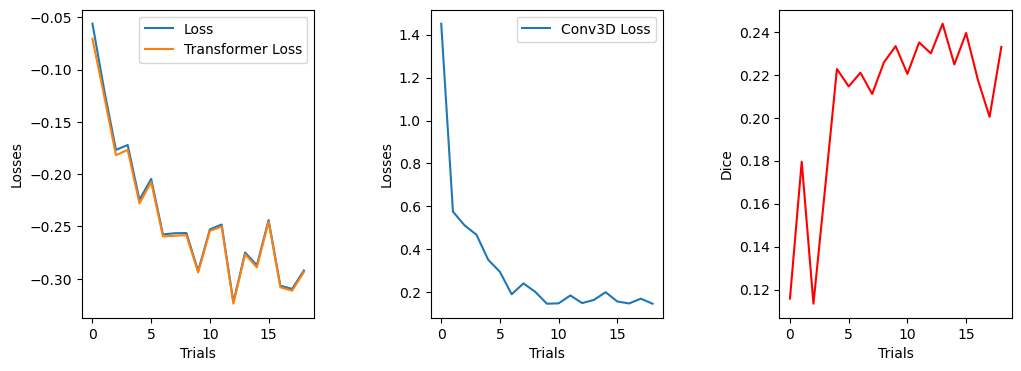


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


/home/cmpsha009/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 154 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
E0000 00:00:1759590275.886834 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_5_1/up_sampling3d_17_1/Repeat/ExpandDims' exist for missing node 'functional_5_1/add_18_1/Add'.


0.646613456747211

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.5, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - conv3d_59_loss: 1.0322 - loss: -0.0873 - transformer_loss: -0.0976


E0000 00:00:1759590383.555140 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_7_1/up_sampling3d_29_1/Repeat/ExpandDims' exist for missing node 'functional_7_1/add_28_1/Add'.


................................................    Validation Dice:  0.0
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.5, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.5, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - conv3d_59_loss: 0.5408 - loss: -0.1613 - transformer_loss: -0.1667
................................................    Validation Dice:  0.0
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.5, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.5, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - conv3d_59_loss: 0.3510 - loss: -0.2143 - transformer_loss: -0.2178
................................................    Validation Dice:

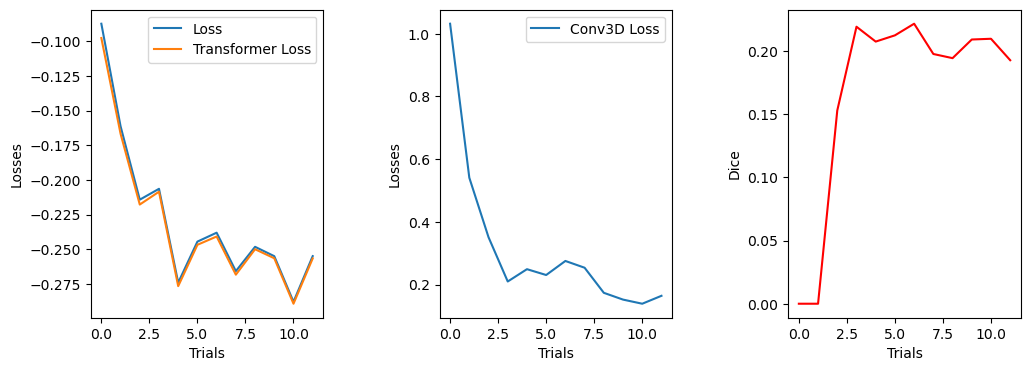


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759591255.115717 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_9_1/up_sampling3d_33_1/Repeat/ExpandDims' exist for missing node 'functional_9_1/add_34_1/Add'.


0.6264155706494808

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.7, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - conv3d_89_loss: 1.1844 - loss: -0.0732 - transformer_loss: -0.0851


E0000 00:00:1759591361.103031 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_11_1/activation_80_1/Relu' exist for missing node 'functional_11_1/add_40_1/Add'.


................................................    Validation Dice:  0.0
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.7, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.7, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - conv3d_89_loss: 0.4935 - loss: -0.1620 - transformer_loss: -0.1670
................................................    Validation Dice:  0.044377208
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.7, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.7, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - conv3d_89_loss: 0.3635 - loss: -0.1836 - transformer_loss: -0.1872
................................................    Validati

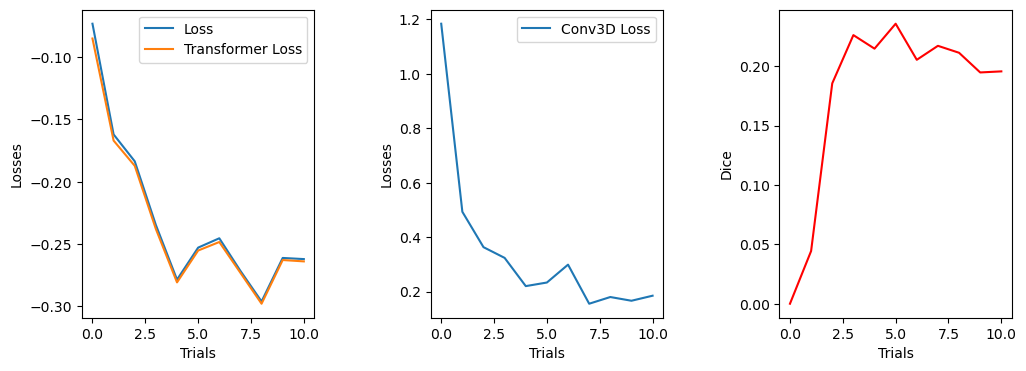


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759592177.962887 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_13_1/up_sampling3d_53_1/Repeat/ExpandDims' exist for missing node 'functional_13_1/add_52_1/Add'.


0.6414284701494154

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=1, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - conv3d_119_loss: 1.4908 - loss: -0.0797 - transformer_loss: -0.0946


E0000 00:00:1759592288.048348 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_15_1/up_sampling3d_59_1/Repeat/ExpandDims' exist for missing node 'functional_15_1/add_59_1/Add'.


................................................    Validation Dice:  0.0038008783
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=1, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=1, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - conv3d_119_loss: 0.8407 - loss: -0.1129 - transformer_loss: -0.1213
................................................    Validation Dice:  0.08392632
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=1, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=1, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - conv3d_119_loss: 0.5237 - loss: -0.2312 - transformer_loss: -0.2365
................................................    Valida

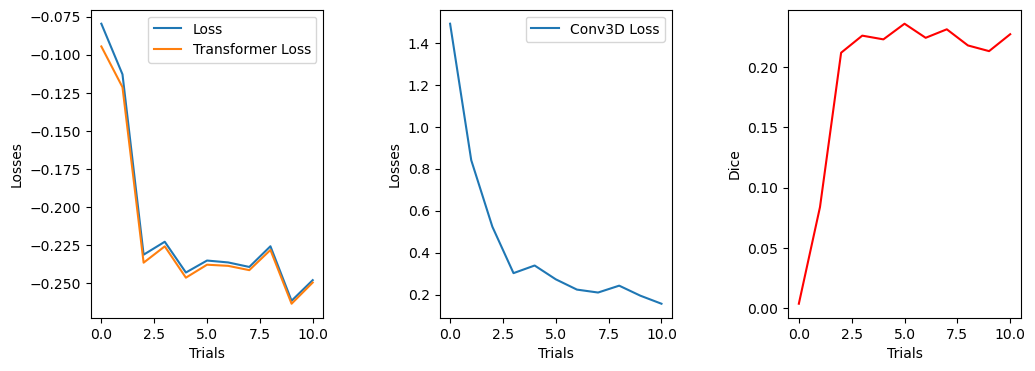


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759593135.218270 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_17_1/up_sampling3d_67_1/Repeat/ExpandDims' exist for missing node 'functional_17_1/add_67_1/Add'.


0.6361791010865328

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=0.2, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - conv3d_149_loss: 1.8638 - loss: -0.0429 - transformer_loss: -0.0615


E0000 00:00:1759593270.325251 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_19_1/up_sampling3d_75_1/Repeat/ExpandDims' exist for missing node 'functional_19_1/add_75_1/Add'.


................................................    Validation Dice:  0.12939893
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=0.2, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=0.2, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - conv3d_149_loss: 0.5981 - loss: -0.1155 - transformer_loss: -0.1215
................................................    Validation Dice:  0.21340412
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=0.2, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=0.2, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - conv3d_149_loss: 0.4084 - loss: -0.1783 - transformer_loss: -0.1824
................................................    

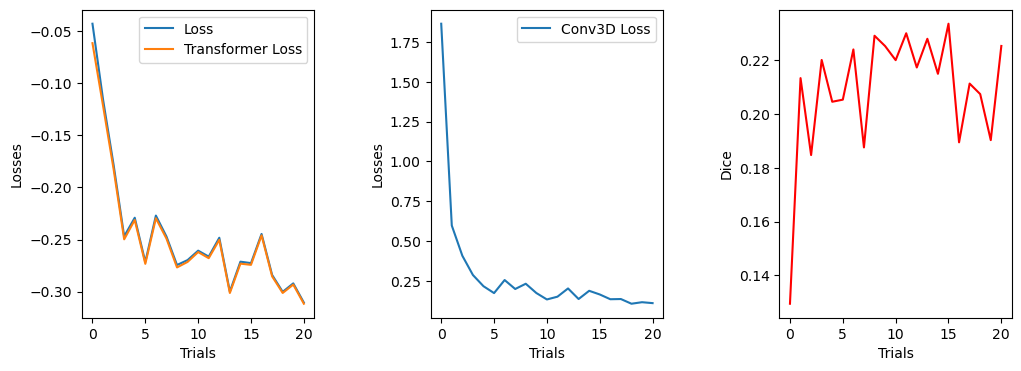


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759595402.271170 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_21_1/up_sampling3d_87_1/Repeat/ExpandDims' exist for missing node 'functional_21_1/add_85_1/Add'.


0.6408586245442198

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=0.5, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - conv3d_179_loss: 1.4758 - loss: -0.0354 - transformer_loss: -0.0502


E0000 00:00:1759595537.544384 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_23_1/activation_170_1/Relu' exist for missing node 'functional_23_1/add_88_1/Add'.


................................................    Validation Dice:  0.01367155
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=0.5, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=0.5, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - conv3d_179_loss: 0.5270 - loss: -0.1408 - transformer_loss: -0.1461
................................................    Validation Dice:  0.18221591
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=0.5, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=0.5, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - conv3d_179_loss: 0.6821 - loss: -0.2058 - transformer_loss: -0.2127
................................................    

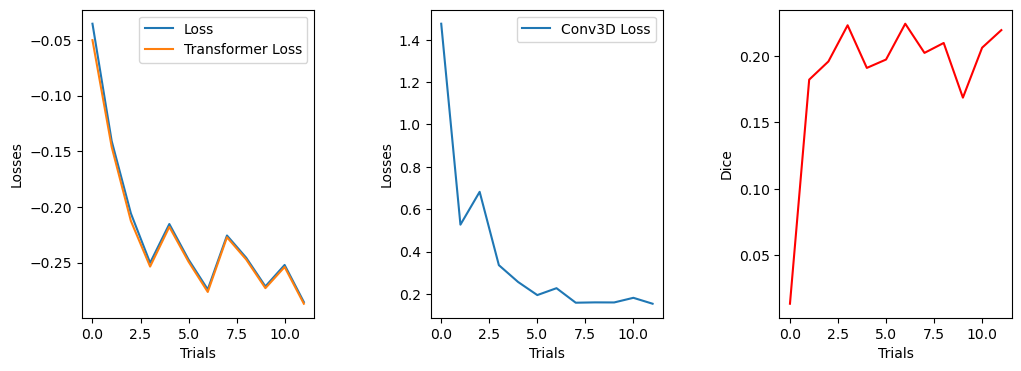


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759596849.833238 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_25_1/activation_185_1/Relu' exist for missing node 'functional_25_1/add_96_1/Add'.


0.6292066131445537

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=0.7, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - conv3d_209_loss: 1.3175 - loss: -0.0481 - transformer_loss: -0.0613


E0000 00:00:1759596992.235722 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_27_1/activation_200_1/Relu' exist for missing node 'functional_27_1/add_104_1/Add'.


................................................    Validation Dice:  0.058263402
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=0.7, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=0.7, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - conv3d_209_loss: 0.6209 - loss: -0.1042 - transformer_loss: -0.1104
................................................    Validation Dice:  0.15451616
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=0.7, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=0.7, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - conv3d_209_loss: 0.3717 - loss: -0.2060 - transformer_loss: -0.2097
................................................   

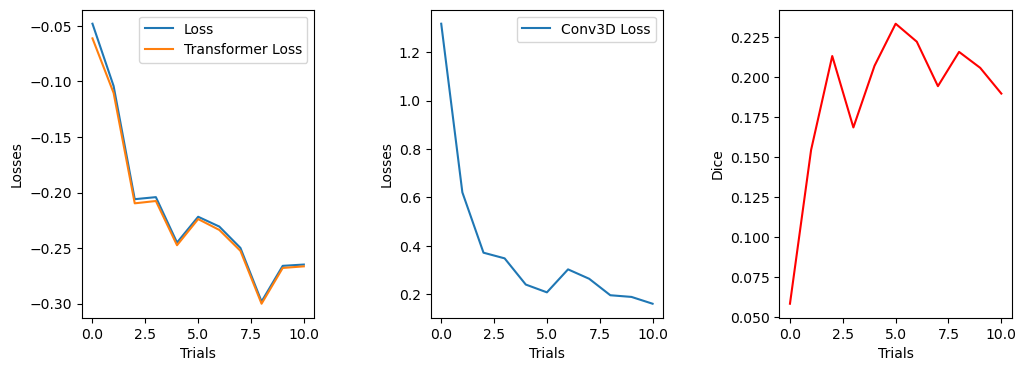


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759598103.116906 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_29_1/up_sampling3d_113_1/Repeat/ExpandDims' exist for missing node 'functional_29_1/add_114_1/Add'.


0.6367647438221946

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=1, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - conv3d_239_loss: 1.4358 - loss: -0.0620 - transformer_loss: -0.0763


E0000 00:00:1759598243.589237 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_31_1/activation_230_1/Relu' exist for missing node 'functional_31_1/add_120_1/Add'.


................................................    Validation Dice:  0.06242393
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=1, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=1, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - conv3d_239_loss: 0.6459 - loss: -0.1493 - transformer_loss: -0.1557
................................................    Validation Dice:  0.10479438
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=1, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.5, p_a=1, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - conv3d_239_loss: 0.4111 - loss: -0.2084 - transformer_loss: -0.2125
................................................    Validati

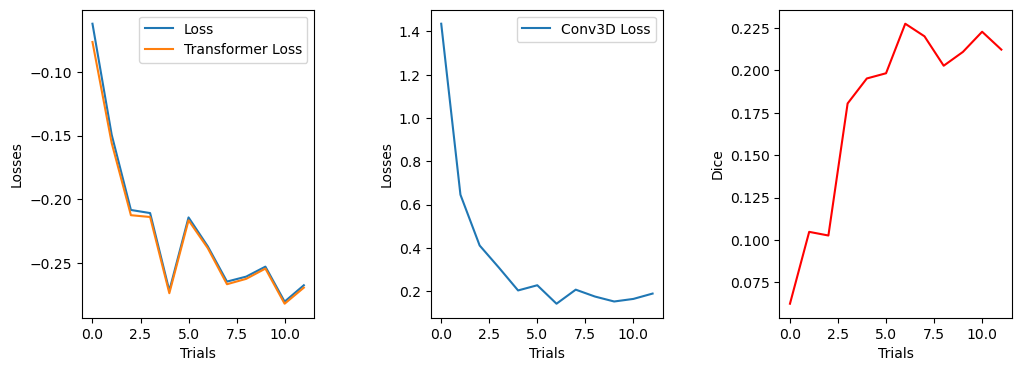


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759599499.138557 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_33_1/activation_247_1/Relu' exist for missing node 'functional_33_1/add_129_1/Add'.


0.6252170563032988

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=0.2, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - conv3d_269_loss: 1.5714 - loss: -0.0583 - transformer_loss: -0.0740


E0000 00:00:1759599659.226669 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_35_1/activation_260_1/Relu' exist for missing node 'functional_35_1/add_136_1/Add'.


................................................    Validation Dice:  0.026995732
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=0.2, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=0.2, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - conv3d_269_loss: 0.6085 - loss: -0.1737 - transformer_loss: -0.1798
................................................    Validation Dice:  0.21182199
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=0.2, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=0.2, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - conv3d_269_loss: 0.4695 - loss: -0.1940 - transformer_loss: -0.1987
................................................  

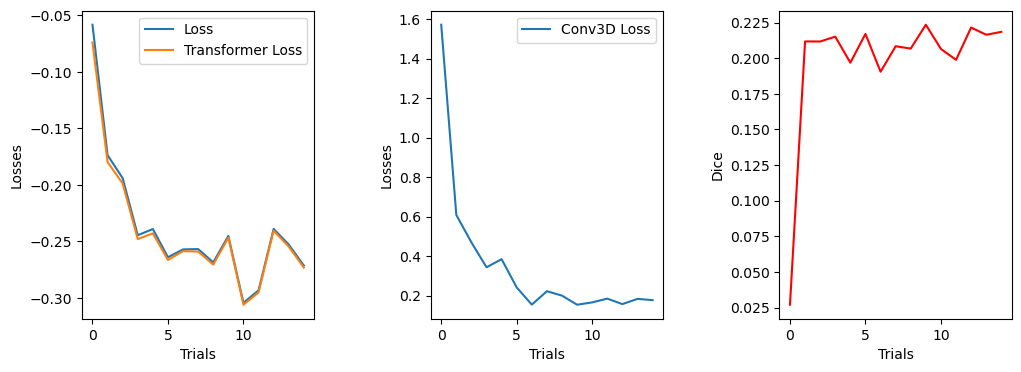


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759601477.482435 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_37_1/activation_277_1/Relu' exist for missing node 'functional_37_1/add_145_1/Add'.


0.6319387838533286

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=0.5, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - conv3d_299_loss: 1.7756 - loss: -0.0538 - transformer_loss: -0.0715


E0000 00:00:1759601631.277207 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_39_1/up_sampling3d_153_1/Repeat/ExpandDims' exist for missing node 'functional_39_1/add_154_1/Add'.


................................................    Validation Dice:  0.15373044
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=0.5, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=0.5, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - conv3d_299_loss: 0.7741 - loss: -0.1327 - transformer_loss: -0.1404
................................................    Validation Dice:  0.17781085
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=0.5, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=0.5, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - conv3d_299_loss: 0.5418 - loss: -0.2098 - transformer_loss: -0.2153
................................................  

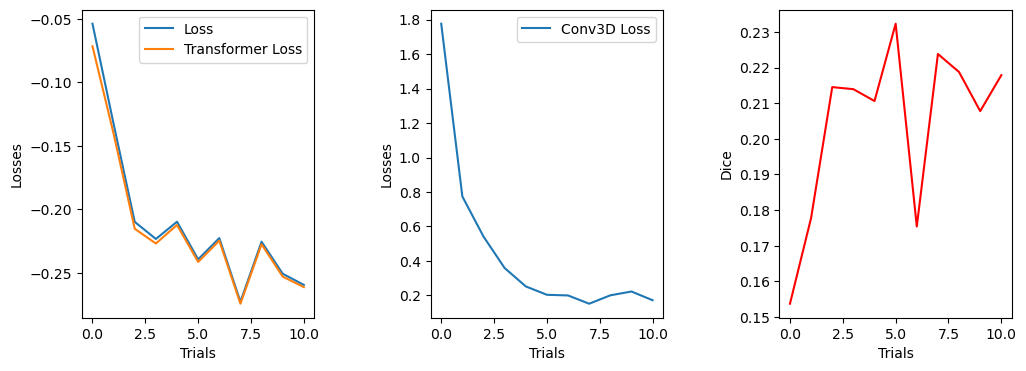


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759602963.139604 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_41_1/up_sampling3d_161_1/Repeat/ExpandDims' exist for missing node 'functional_41_1/add_162_1/Add'.


0.6331773115672434

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=0.7, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - conv3d_329_loss: 1.4027 - loss: -0.0510 - transformer_loss: -0.0651


E0000 00:00:1759603120.269181 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_43_1/activation_322_1/Relu' exist for missing node 'functional_43_1/add_169_1/Add'.


................................................    Validation Dice:  0.16137414
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=0.7, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=0.7, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - conv3d_329_loss: 0.5458 - loss: -0.1459 - transformer_loss: -0.1513
................................................    Validation Dice:  0.17216049
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=0.7, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=0.7, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - conv3d_329_loss: 0.3867 - loss: -0.2220 - transformer_loss: -0.2259
................................................  

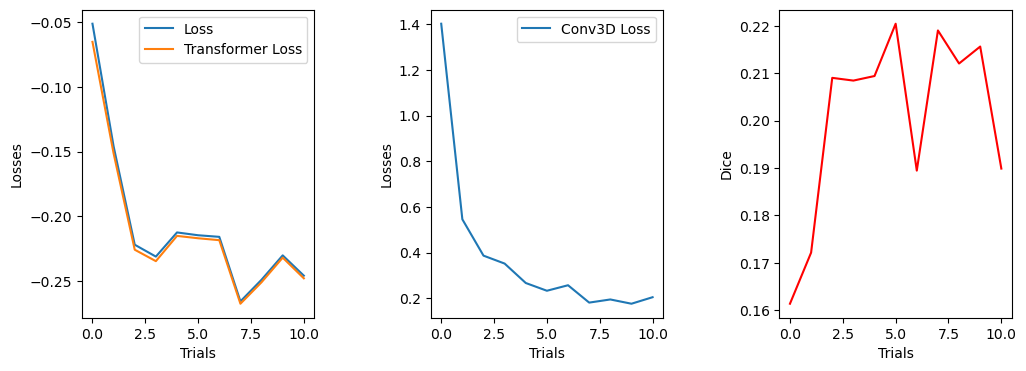


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759604460.981181 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_45_1/up_sampling3d_181_1/Repeat/ExpandDims' exist for missing node 'functional_45_1/add_180_1/Add'.


0.6279159471681479

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=1, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - conv3d_359_loss: 1.9905 - loss: -0.0389 - transformer_loss: -0.0588


E0000 00:00:1759604616.087922 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_47_1/up_sampling3d_191_1/Repeat/ExpandDims' exist for missing node 'functional_47_1/add_189_1/Add'.


................................................    Validation Dice:  0.058972653
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=1, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=1, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - conv3d_359_loss: 0.4685 - loss: -0.1825 - transformer_loss: -0.1872
................................................    Validation Dice:  0.14874515
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=1, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.7, p_a=1, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - conv3d_359_loss: 0.4630 - loss: -0.2205 - transformer_loss: -0.2252
................................................    Valid

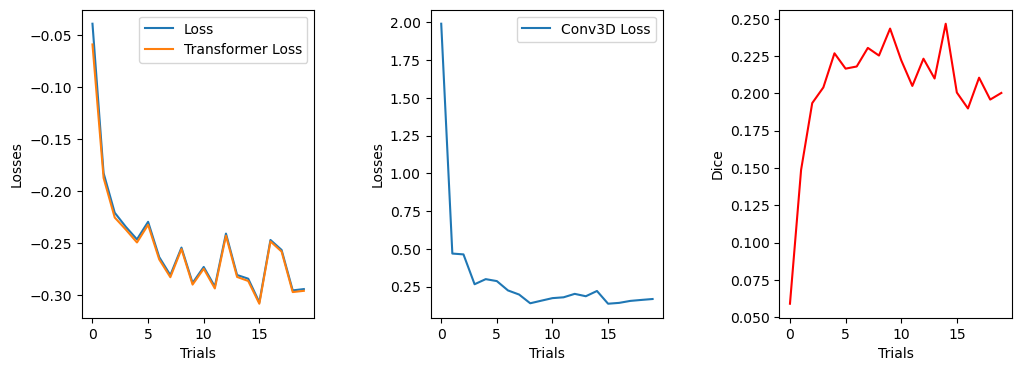


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759607144.437573 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_49_1/up_sampling3d_197_1/Repeat/ExpandDims' exist for missing node 'functional_49_1/add_196_1/Add'.


0.639102686610298

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=0.2, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - conv3d_389_loss: 1.6475 - loss: -0.0734 - transformer_loss: -0.0899


E0000 00:00:1759607335.045336 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_51_1/activation_382_1/Relu' exist for missing node 'functional_51_1/add_201_1/Add'.


................................................    Validation Dice:  0.01105401
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=0.2, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=0.2, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - conv3d_389_loss: 0.4809 - loss: -0.1515 - transformer_loss: -0.1563
................................................    Validation Dice:  0.1444631
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=0.2, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=0.2, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 132s 4s/step - conv3d_389_loss: 0.4477 - loss: -0.1639 - transformer_loss: -0.1684
................................................    Validat

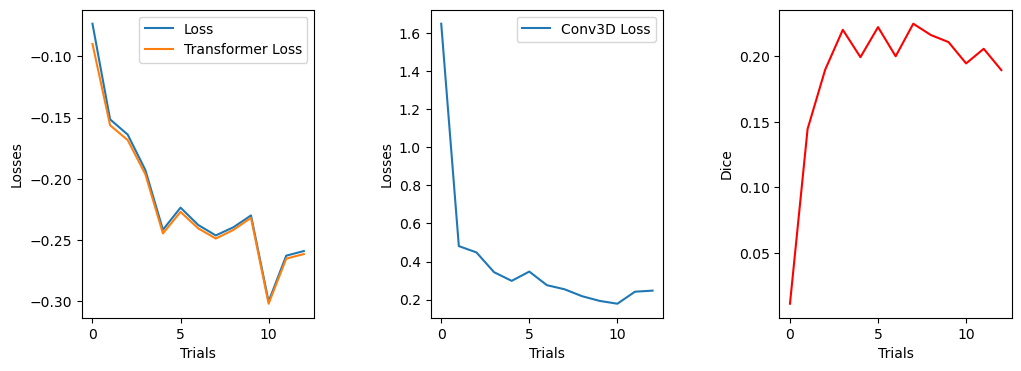


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759609196.256526 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_53_1/up_sampling3d_211_1/Repeat/ExpandDims' exist for missing node 'functional_53_1/add_211_1/Add'.


0.6340058943360806

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=0.5, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - conv3d_419_loss: 1.1297 - loss: -0.0593 - transformer_loss: -0.0706


E0000 00:00:1759609380.185884 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_55_1/activation_410_1/Relu' exist for missing node 'functional_55_1/add_216_1/Add'.


................................................    Validation Dice:  0.0
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=0.5, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=0.5, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - conv3d_419_loss: 0.5533 - loss: -0.1186 - transformer_loss: -0.1241
................................................    Validation Dice:  0.120914824
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=0.5, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=0.5, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 130s 4s/step - conv3d_419_loss: 0.2649 - loss: -0.1929 - transformer_loss: -0.1955
................................................    Validation D

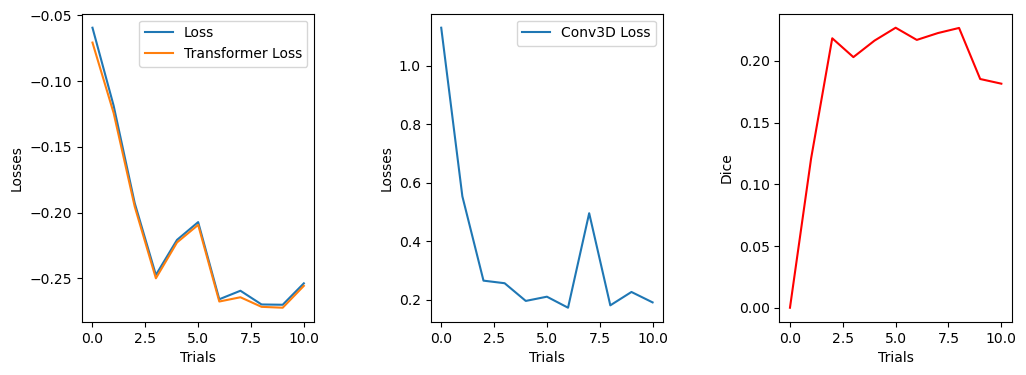


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759610951.055965 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_57_1/up_sampling3d_231_1/Repeat/ExpandDims' exist for missing node 'functional_57_1/add_229_1/Add'.


0.6270129944555708

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=0.7, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - conv3d_449_loss: 1.4356 - loss: -0.0639 - transformer_loss: -0.0783


E0000 00:00:1759611131.803444 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_59_1/up_sampling3d_233_1/Repeat/ExpandDims' exist for missing node 'functional_59_1/add_234_1/Add'.


................................................    Validation Dice:  0.10169101
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=0.7, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=0.7, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - conv3d_449_loss: 0.5502 - loss: -0.1658 - transformer_loss: -0.1713
................................................    Validation Dice:  0.19955353
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=0.7, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=0.7, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - conv3d_449_loss: 0.4121 - loss: -0.2115 - transformer_loss: -0.2156
................................................    Valida

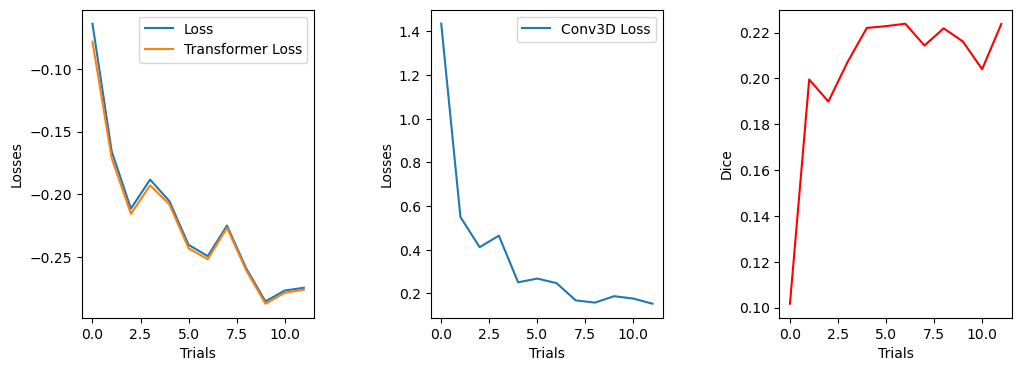


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759612869.511896 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_61_1/up_sampling3d_241_1/Repeat/ExpandDims' exist for missing node 'functional_61_1/add_242_1/Add'.


0.6237528216013071

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=1, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - conv3d_479_loss: 1.1682 - loss: -0.0786 - transformer_loss: -0.0902


E0000 00:00:1759613056.578889 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_63_1/up_sampling3d_249_1/Repeat/ExpandDims' exist for missing node 'functional_63_1/add_250_1/Add'.


................................................    Validation Dice:  0.16081901
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=1, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=1, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - conv3d_479_loss: 0.4669 - loss: -0.1440 - transformer_loss: -0.1487
................................................    Validation Dice:  0.21654129
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=1, lam=0.01, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=1, p_a=1, lam=0.01, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - conv3d_479_loss: 0.3413 - loss: -0.2215 - transformer_loss: -0.2249
................................................    Validation Dic

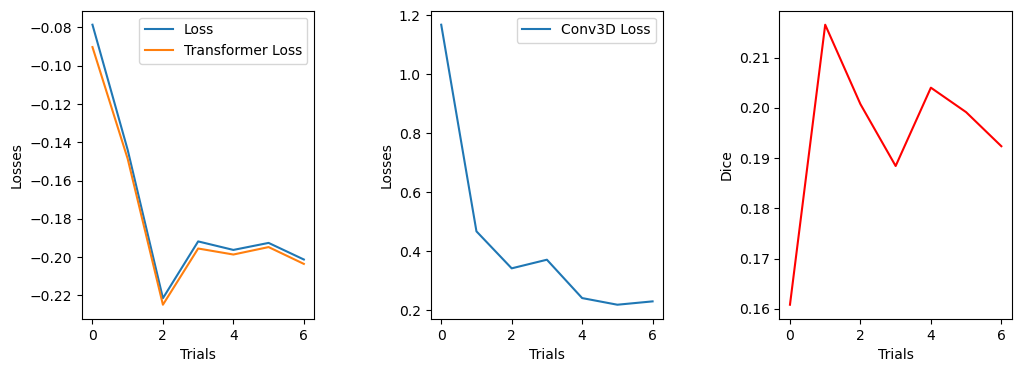


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759614026.149929 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_65_1/activation_485_1/Relu' exist for missing node 'functional_65_1/add_256_1/Add'.


0.6212726248285926

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.2, lam=0.05, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - conv3d_509_loss: 0.9279 - loss: -0.0708 - transformer_loss: -0.1172


E0000 00:00:1759614128.611306 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_67_1/up_sampling3d_271_1/Repeat/ExpandDims' exist for missing node 'functional_67_1/add_269_1/Add'.


................................................    Validation Dice:  0.0025243654
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.2, lam=0.05, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.2, lam=0.05, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - conv3d_509_loss: 0.2642 - loss: -0.1392 - transformer_loss: -0.1525
................................................    Validation Dice:  0.1928912
Training history saved.
Weights for trail1 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.2, lam=0.05, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.2, lam=0.05, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - conv3d_509_loss: 0.2076 - loss: -0.1851 - transformer_loss: -0.1955
................................................   

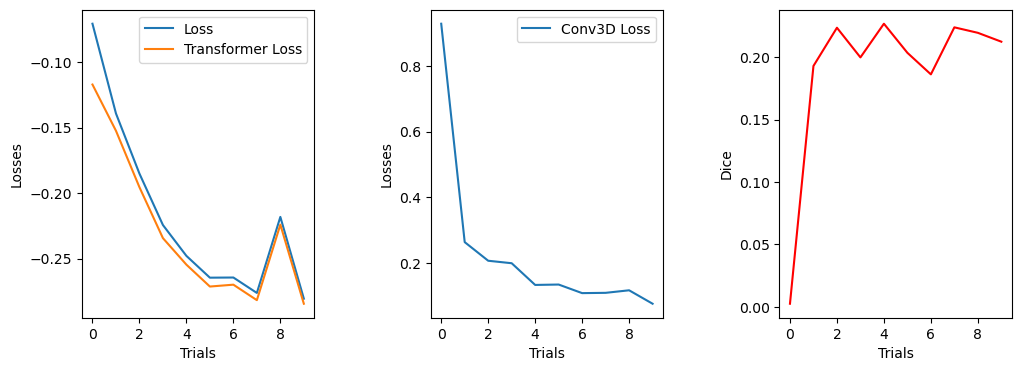


Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


E0000 00:00:1759614815.138936 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_69_1/activation_515_1/Relu' exist for missing node 'functional_69_1/add_272_1/Add'.


0.6348070906702442

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.5, lam=0.05, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - conv3d_539_loss: 0.9097 - loss: -0.0331 - transformer_loss: -0.0786


E0000 00:00:1759614914.138113 2914471 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_71_1/up_sampling3d_281_1/Repeat/ExpandDims' exist for missing node 'functional_71_1/add_282_1/Add'.


................................................    Validation Dice:  0.18929474
Training history saved.
Weights for trail0 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.5, lam=0.05, lr=0.0005_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.5, lam=0.05, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - conv3d_539_loss: 0.2821 - loss: -0.1708 - transformer_loss: -0.1849
................................................    Validation Dice:  0.15998179
Training history saved.

Trial 2 / 1023 of Experiment :alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.5, lam=0.05, lr=0.0005
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - conv3d_539_loss: 0.1804 - loss: -0.1726 - transformer_loss: -0.1816
................................................    Validation Dice:  0.1994106
Training history saved.
Weights for trail2 saved to H2_Experiments/alpha=2, sigma=20, degree_range=-5,5, p_e=0.2, p_a=0.5, la

In [ ]:
for lr in [0.0005, 0.001, 0.01]:
    for lam in [0.01, 0.05, 0.1, 0.2]:
        for p_elastic in [0.2, 0.5, 0.7, 1]:
            for p_affine in [0.2, 0.5, 0.7, 1]: 
                    
                name = f"alpha={alpha_sigma[0]}, sigma={alpha_sigma[1]}, degree_range={degree_range[0]},{degree_range[1]}, p_e={p_elastic}, p_a={p_affine}, lam={lam}, lr={lr}"

                if check_string_in_first_column(csv_path, name):
                    print(f"{name} already in csv..")
                else:        
                    run_experiments_H2(     name,
                                            p_affine=p_affine,
                                            p_elastic=p_elastic,
                                            alpha=alpha_sigma[0],
                                            sigma=alpha_sigma[1],
                                            degree_range=degree_range,
                                            model_save_path = "H2_Experiments/",
                                            lr=lr,
                                            lambda_param=lam,
                                            Verbose=False,
                                            wait=5,
                                            write = False,
                                            attempts=1
                                            )

In [ ]:
# import os
# import glob

# model_save_path = 'C_Experiments/C_test_Checkpoints'
# attempts = 2
# best_attempt = [1]

# def remove_num_files(num, path=model_save_path):
#     """
#     Remove files ending with {num}.npy and {num}.weights.h5 from the specified path.
    
#     Args:
#         num (int or str): The number to match in filenames
#         path (str): The directory path to search for files
    
#     Returns:
#         list: Names of files that were successfully removed
#     """
#     # Convert num to string for pattern matching
#     num_str = str(num)
    
#     # Construct the search patterns
#     npy_pattern = os.path.join(path, f"*{num_str}.npy")
#     weights_pattern = os.path.join(path, f"*{num_str}.weights.h5")
    
#     # Find all matching files
#     npy_files = glob.glob(npy_pattern)
#     weights_files = glob.glob(weights_pattern)
    
#     # Combine all files to remove
#     files_to_remove = npy_files + weights_files
    
#     # Remove the files
#     removed_files = []
#     for file_path in files_to_remove:
#         try:
#             os.remove(file_path)
#             removed_files.append(os.path.basename(file_path))
#             print(f"Removed: {file_path}")
#         except OSError as e:
#             print(f"Error removing {file_path}: {e}")
    
#     return removed_files

# for attempt in range(attempts):
#     if attempt != best_attempt[0]:
#         remove_num_files(attempt)
    
# os.remove(model_save_path + f"/BEST_DICE{best_attempt[0]}.weights.h5")

In [13]:
attempt = 0
print("val_dice"+str(attempt)+".npy")

val_dice0.npy


2025-10-20 15:47:38.588328: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)



Backbone model inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 3)

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)

Trial 0 / 1023 of Experiment :test


2025-10-20 15:47:50.083477: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT32 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


32/32 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - conv3d_14_loss: 0.6470 - loss: -0.0475 - transformer_loss: -0.1122


E0000 00:00:1760968108.758842 3988140 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_1_1/up_sampling3d_7_1/Repeat/ExpandDims' exist for missing node 'functional_1_1/add_5_1/Add'.


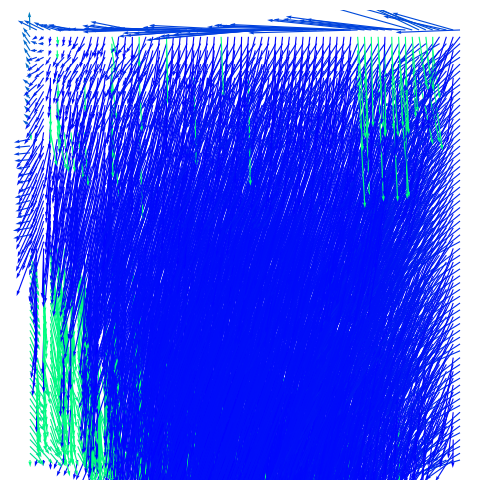

................................................[0.07597099989652634, 0.0, 0.0, 0.0, 0.0, 0.08687159419059753, 0.06625234335660934, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


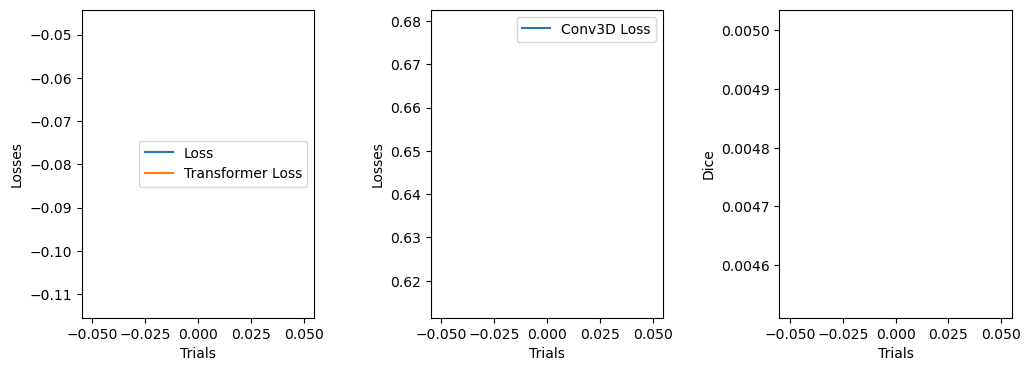

    Validation Dice:  0.0047728117
Training history saved.
Weights for trail0 saved to H2_Experiments/test_Checkpoints/BEST_DICE0.weights.h5

Trial 1 / 1023 of Experiment :test
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - conv3d_14_loss: 0.1703 - loss: -0.2203 - transformer_loss: -0.2373


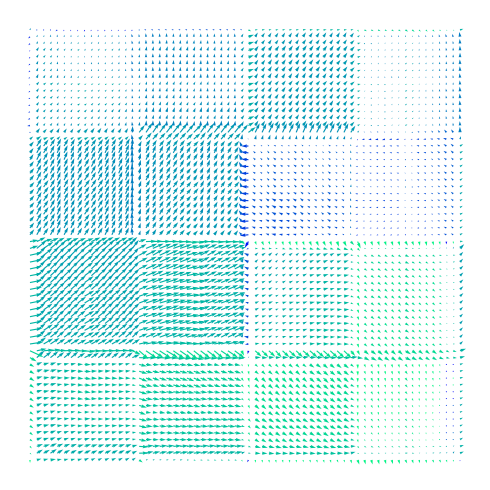

................................................[0.8720046877861023, 0.5411922335624695, 0.5488885045051575, 0.016059160232543945, 0.018829086795449257, 0.7312672734260559, 0.7374851107597351, 0.009381964802742004, 1.3378600669966545e-05, 0.0012916317209601402, 0.0009665742400102317, 0.0, 0.0, 0.012136713601648808, 0.00405900226905942, 0.0, 0.42956292629241943, 0.0, 0.0, 0.0, 0.0, 0.0012621482601389289, 0.0004760994343087077, 0.0, 0.07215059548616409, 0.00202166847884655, 0.00490074697881937, 0.0, 0.0, 0.0007877446478232741, 0.002142375335097313, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


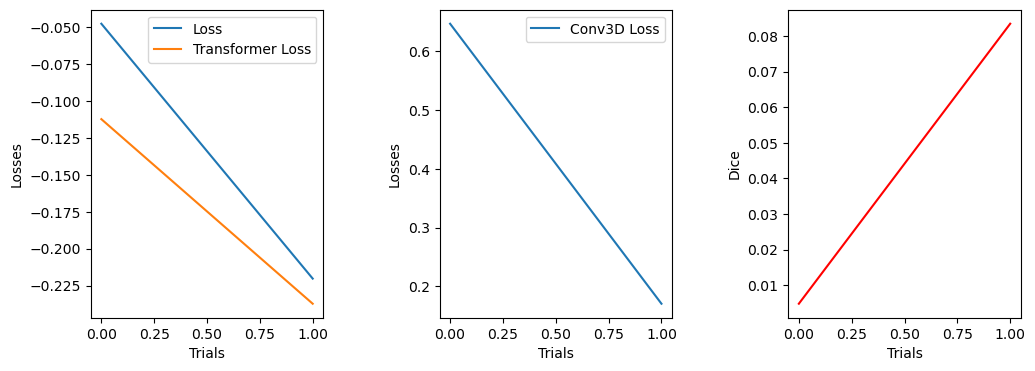

    Validation Dice:  0.083476655
Training history saved.
Weights for trail1 saved to H2_Experiments/test_Checkpoints/BEST_DICE0.weights.h5

Trial 2 / 1023 of Experiment :test
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - conv3d_14_loss: 0.1441 - loss: -0.2125 - transformer_loss: -0.2269


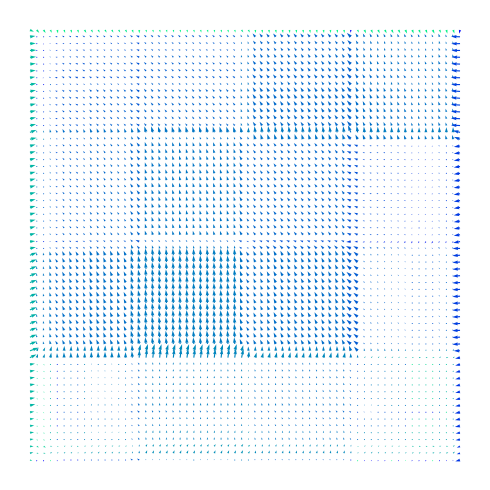

................................................[0.8867670297622681, 0.8746781945228577, 0.8593399524688721, 0.8706021308898926, 0.8029758334159851, 0.8266429305076599, 0.8440110087394714, 0.8679767847061157, 6.05169334448874e-05, 0.00482152821496129, 0.1035798117518425, 0.0007806286448612809, 1.3209407526137973e-12, 0.17099425196647644, 0.15066741406917572, 0.04449739679694176, 0.37227949500083923, 0.0, 0.0, 0.17985029518604279, 0.04895685613155365, 0.34511637687683105, 0.41949889063835144, 0.46543383598327637, 0.12028941512107849, 0.3285067081451416, 0.2656802833080292, 0.000153041270095855, 0.0, 0.3938065469264984, 0.5484827160835266, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


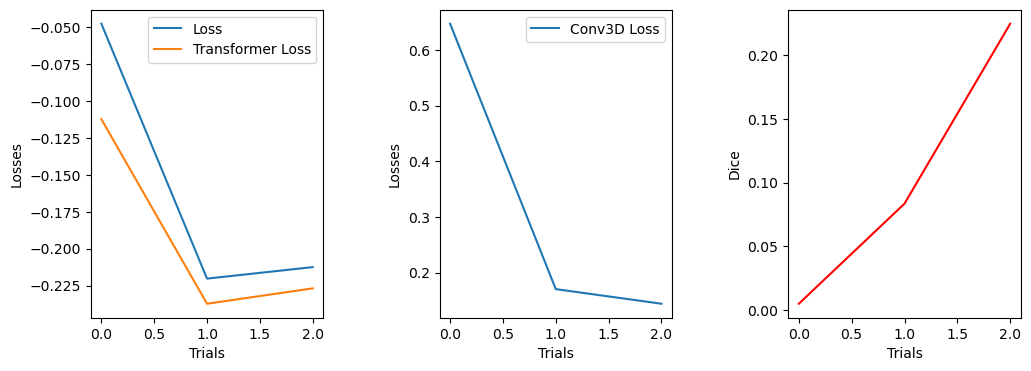

    Validation Dice:  0.22492604
Training history saved.
Weights for trail2 saved to H2_Experiments/test_Checkpoints/BEST_DICE0.weights.h5

Trial 3 / 1023 of Experiment :test
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - conv3d_14_loss: 0.1019 - loss: -0.2478 - transformer_loss: -0.2580


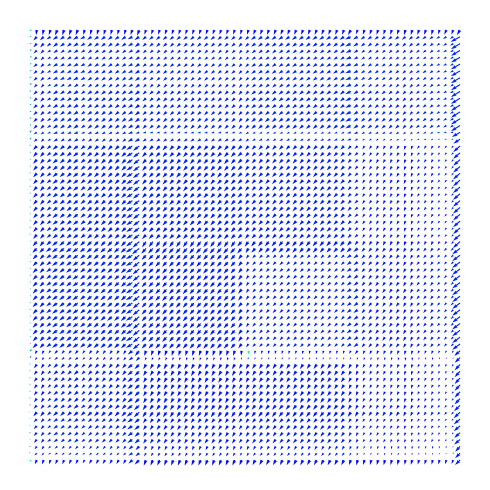

................................................[0.8797370791435242, 0.8694545030593872, 0.8523069620132446, 0.8775849342346191, 0.8127920031547546, 0.8184860944747925, 0.8363765478134155, 0.8706555962562561, 0.0002514151856303215, 0.0023889336735010147, 0.07921405881643295, 0.014217753894627094, 6.107611483230357e-08, 0.24841587245464325, 0.2508075535297394, 0.0057907928712666035, 0.2982458174228668, 0.0, 0.0, 0.035677261650562286, 0.15522374212741852, 0.20039115846157074, 0.2545739710330963, 0.4892740547657013, 0.0362364798784256, 0.2935151159763336, 0.21812540292739868, 3.7198610698396806e-06, 0.0, 0.21970875561237335, 0.36843571066856384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


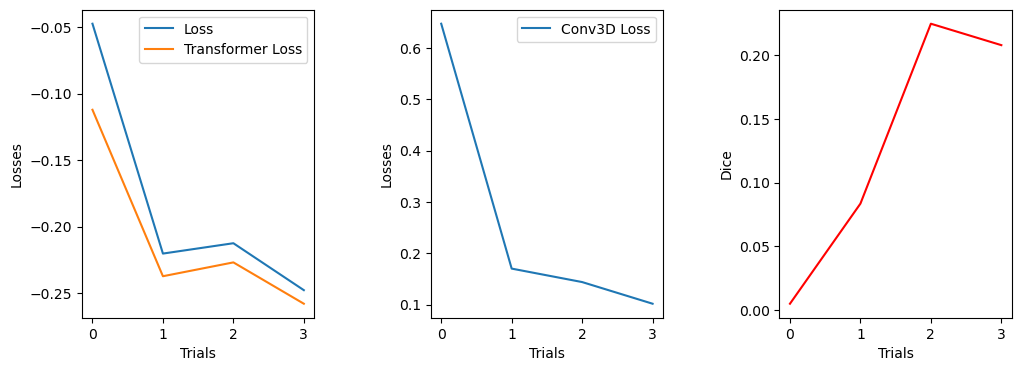

    Validation Dice:  0.20808107
Training history saved.

Trial 4 / 1023 of Experiment :test
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - conv3d_14_loss: 0.0550 - loss: -0.2627 - transformer_loss: -0.2682


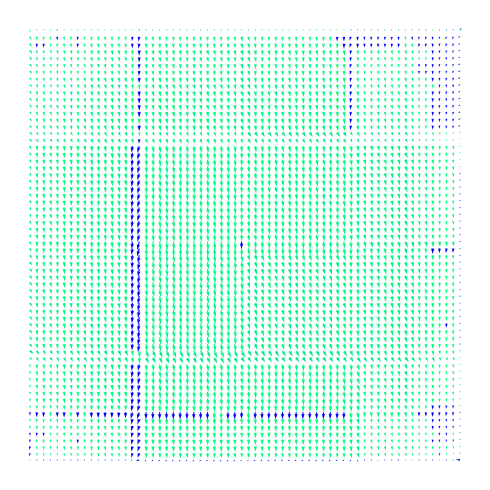

................................................[0.8743141293525696, 0.8681716918945312, 0.852231502532959, 0.8686450719833374, 0.8087368607521057, 0.8174988627433777, 0.8321338891983032, 0.8708137273788452, 0.000914722797460854, 0.0001565939310239628, 0.0303295087069273, 0.004985556937754154, 1.7181117639708532e-12, 0.1848549097776413, 0.1788022518157959, 0.023161081597208977, 0.3688763380050659, 0.0, 0.0, 0.053036049008369446, 0.10958883166313171, 0.13148678839206696, 0.18285301327705383, 0.5271224975585938, 0.016379699110984802, 0.3374972641468048, 0.229231595993042, 0.00014576016110368073, 0.0, 0.1202322244644165, 0.23185500502586365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


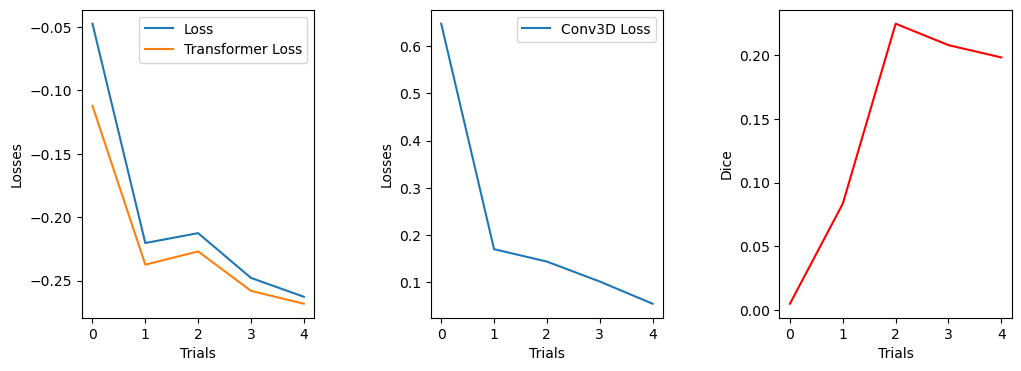

    Validation Dice:  0.19841783
Training history saved.

Trial 5 / 1023 of Experiment :test
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - conv3d_14_loss: 0.0762 - loss: -0.2451 - transformer_loss: -0.2528


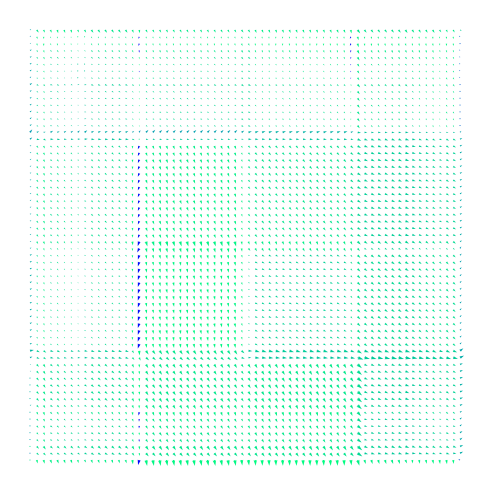

................................................[0.8748096227645874, 0.8638820052146912, 0.8536056280136108, 0.871117115020752, 0.8064489960670471, 0.8254945874214172, 0.8412713408470154, 0.8717012405395508, 0.00032925905543379486, 0.0023688008077442646, 0.0728672668337822, 0.000295445992378518, 7.620056929197316e-13, 0.09032070636749268, 0.06677640229463577, 0.10132510960102081, 0.4880186915397644, 0.0, 0.0, 0.14091342687606812, 0.2499704509973526, 0.23927779495716095, 0.36266160011291504, 0.5493324995040894, 0.11922936886548996, 0.4614346921443939, 0.3724486529827118, 0.00042812302126549184, 0.0, 0.22783784568309784, 0.37036728858947754, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


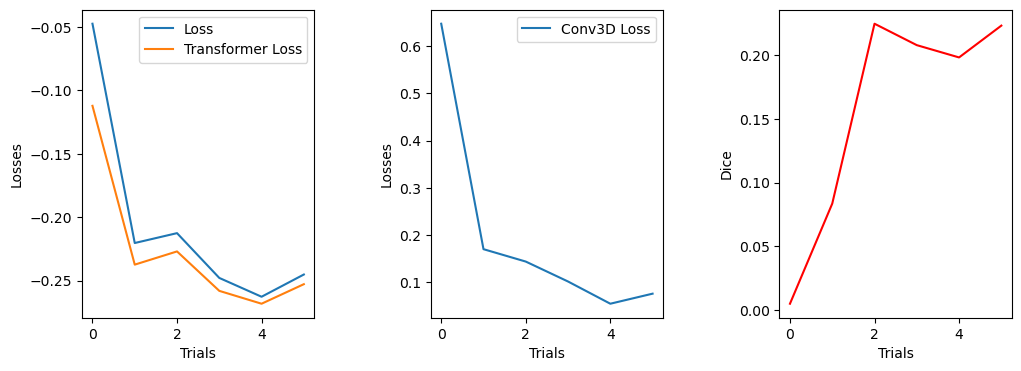

    Validation Dice:  0.22342779
Training history saved.

Trial 6 / 1023 of Experiment :test
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - conv3d_14_loss: 0.0595 - loss: -0.2542 - transformer_loss: -0.2602


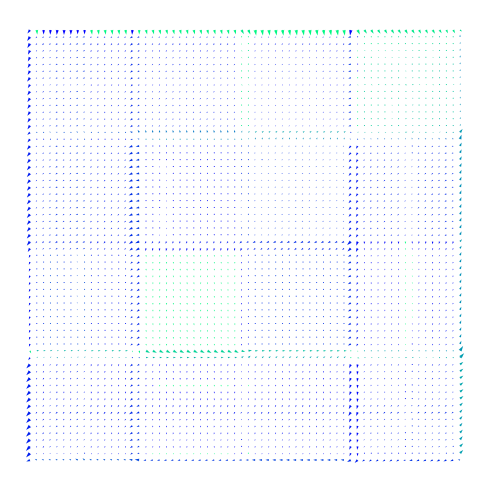

................................................[0.8897572159767151, 0.8808861374855042, 0.864603579044342, 0.8809292912483215, 0.8137764930725098, 0.8249466419219971, 0.8423390984535217, 0.8768653869628906, 0.0002258404711028561, 0.003016822272911668, 0.09620121866464615, 0.004630774259567261, 4.2742737349499293e-08, 0.2014574408531189, 0.18778075277805328, 0.03317762911319733, 0.4235151410102844, 0.0, 0.0, 0.12909959256649017, 0.20398786664009094, 0.2597157657146454, 0.305864155292511, 0.5592131018638611, 0.05993468314409256, 0.3396996557712555, 0.25708961486816406, 5.8815639931708574e-06, 0.0, 0.2791471481323242, 0.43696004152297974, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


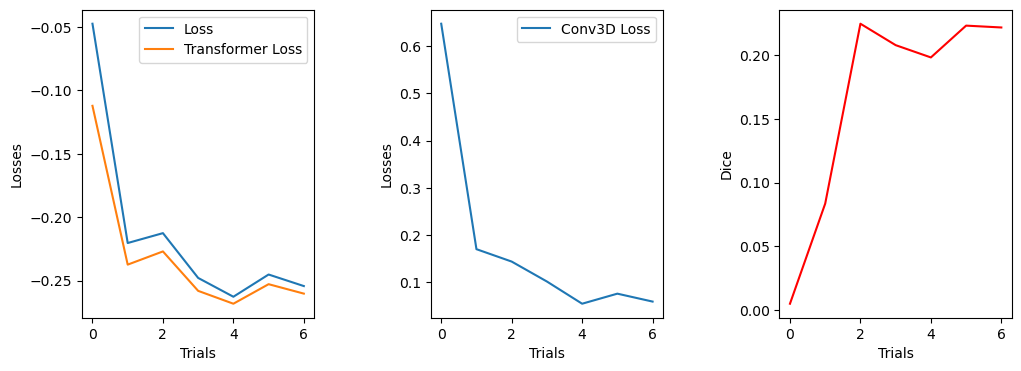

    Validation Dice:  0.22197556
Training history saved.

Trial 7 / 1023 of Experiment :test
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - conv3d_14_loss: 0.0781 - loss: -0.2395 - transformer_loss: -0.2473


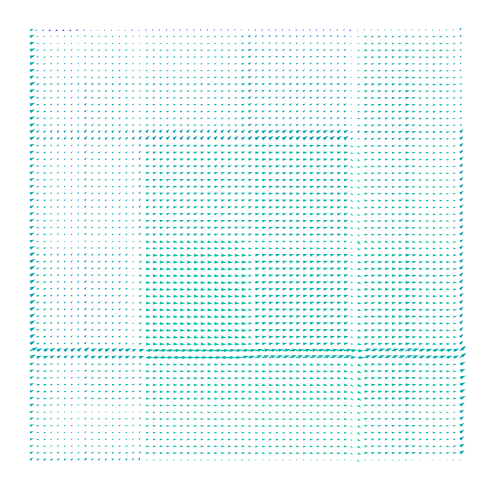

................................................[0.8815838098526001, 0.8758214116096497, 0.8608627319335938, 0.8742049932479858, 0.8149352073669434, 0.82222580909729, 0.838413655757904, 0.8779975175857544, 0.005081749986857176, 0.0001719008869258687, 0.03548627719283104, 0.004067994654178619, 1.307962961029363e-12, 0.18604624271392822, 0.13614457845687866, 0.08198785781860352, 0.5756892561912537, 0.0, 0.0, 0.13620011508464813, 0.2630567252635956, 0.2392635941505432, 0.22044168412685394, 0.6311988830566406, 0.04514531418681145, 0.3345276117324829, 0.2304258495569229, 0.0024825611617416143, 0.0, 0.23756851255893707, 0.3312375843524933, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


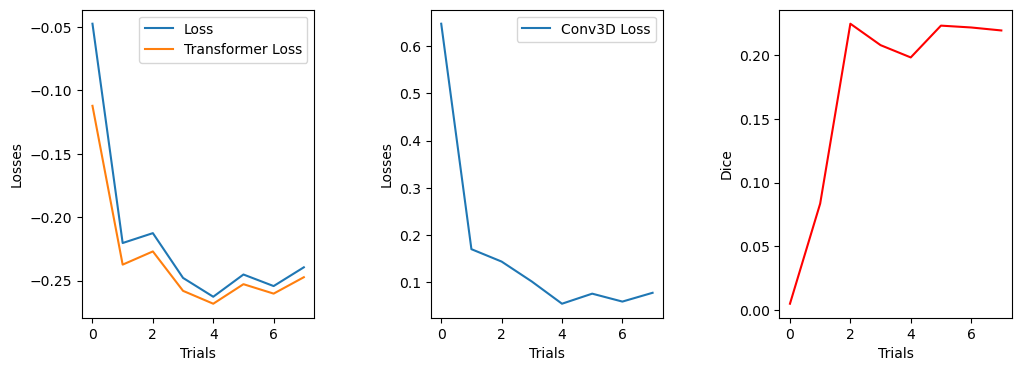

    Validation Dice:  0.2196306
Training history saved.
Ending Experiment


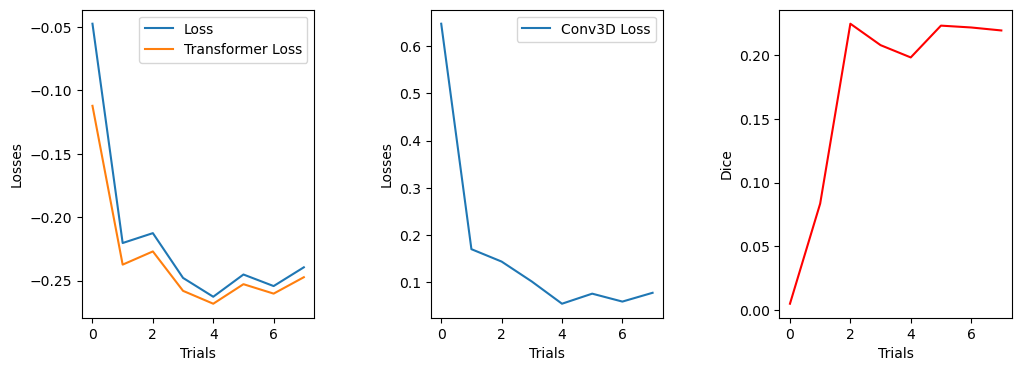


Backbone model inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 3)

Registration network inputs and outputs:
    input shape:  (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1), (None, 64, 64, 64, 1)
    output shape: (None, 64, 64, 64, 1), (None, 64, 64, 64, 3), (None, 64, 64, 64, 1)


/home/cmpsha009/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 154 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Evaluating for experiment test, attempt 0


E0000 00:00:1760968499.002818 3988140 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'functional_3_1/activation_22_1/Relu' exist for missing node 'functional_3_1/add_9_1/Add'.


KeyboardInterrupt: 

In [13]:
for lr in [0.0005]:
    for lam in [0.1]:
                    
        name = "test"
       
        run_experiments_H2(     name,
                                p_affine=0,
                                p_elastic=0,
                                alpha=25,
                                sigma=1,
                                degree_range=[-1, 1],
                                model_save_path = "H2_Experiments/",
                                lr=lr,
                                lambda_param=lam,
                                Verbose=True,
                                wait=5,
                                write = False,
                                attempts=1
                                )